# NYC Taxi Data EDA

## Install Packages

In [1]:
#!pip3 install plotly cufflinks pandas numpy seaborn matplotlib pandas-gbq
#pip install chart_studio
from chart_studio import plotly

In [2]:
import cufflinks as cf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
print(cf.__version__)

%config InlineBackend.figure_format = 'retina'
cf.go_offline()

0.17.3


# NYC Taxi Demand (2015-01)

In [18]:
%%time
query = """
SELECT 
    DATETIME_TRUNC(pickup_datetime, hour) as pickup_hour,
    count(*) as cnt
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
GROUP BY pickup_hour
ORDER BY pickup_hour
"""

df = pd.read_gbq(query=query, dialect='standard', project_id='smiling-office-000000', auth_local_webserver=True)

CPU times: user 46.4 ms, sys: 7.05 ms, total: 53.4 ms
Wall time: 1.94 s


In [19]:
df.tail(10)

,pickup_hour,cnt
734,2015-01-31 14:00:00,25059
735,2015-01-31 15:00:00,25886
736,2015-01-31 16:00:00,23822
737,2015-01-31 17:00:00,25794
738,2015-01-31 18:00:00,30804
739,2015-01-31 19:00:00,32436
740,2015-01-31 20:00:00,27555
741,2015-01-31 21:00:00,27477
742,2015-01-31 22:00:00,29862
743,2015-01-31 23:00:00,29856


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pickup_hour  744 non-null    datetime64[ns]
 1   cnt          744 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.8 KB


In [ ]:
#df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])

In [21]:
df = df.set_index('pickup_hour')

In [22]:
df.iplot(kind='scatter',xTitle='Datetimes',yTitle='Demand',title='NYC Taxi Demand(2015-01)')

In [24]:
df['date'] = df.index.date

In [26]:
df.groupby(['date'])[['cnt']].sum().iplot()

In [27]:
df['weekday'] = df.index.weekday
df['hour'] = df.index.hour
df['weeknum'] = df.index.week

In [28]:
df.head()

,cnt,date,weekday,hour,weeknum
pickup_hour,,,,,
2015-01-01 00:00:00,28312,2015-01-01,3,0,1
2015-01-01 01:00:00,31707,2015-01-01,3,1,1
2015-01-01 02:00:00,28068,2015-01-01,3,2,1
2015-01-01 03:00:00,24288,2015-01-01,3,3,1
2015-01-01 04:00:00,17081,2015-01-01,3,4,1


In [29]:
df.head()

,cnt,date,weekday,hour,weeknum
pickup_hour,,,,,
2015-01-01 00:00:00,28312,2015-01-01,3,0,1
2015-01-01 01:00:00,31707,2015-01-01,3,1,1
2015-01-01 02:00:00,28068,2015-01-01,3,2,1
2015-01-01 03:00:00,24288,2015-01-01,3,3,1
2015-01-01 04:00:00,17081,2015-01-01,3,4,1


### Hourly

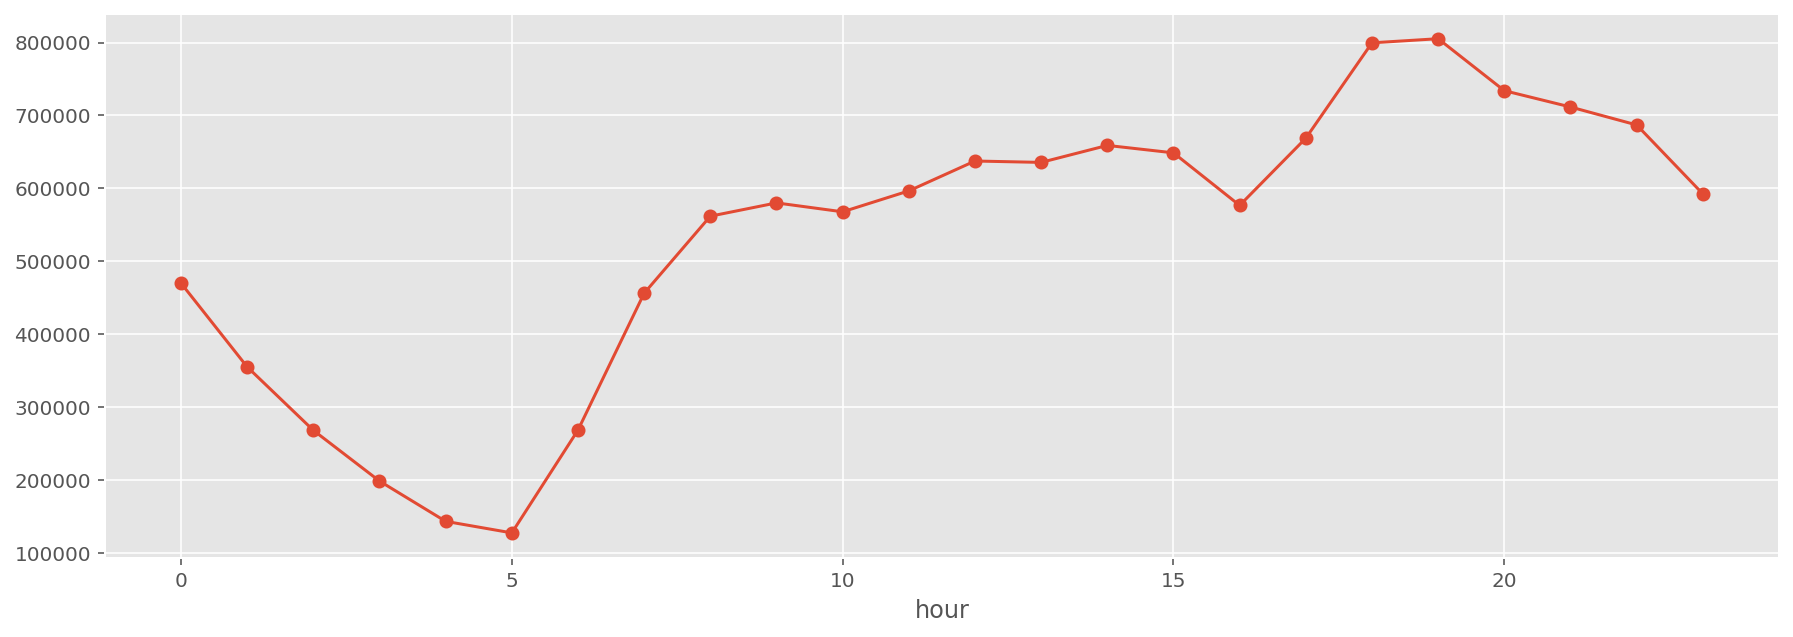

In [30]:
df.groupby('hour')['cnt'].sum().plot(x='hour', y='cnt', kind='line', style="-o", figsize=(15,5));

### weekday

In [31]:
df.groupby(['hour', 'weekday'])['cnt'].mean().unstack()

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,8552.75,6719.25,8787.00,14326.4,14054.2,25487.2,26099.00
1,5360.50,3707.00,5283.25,11440.4,8785.6,21118.6,22754.75
2,3675.25,2361.75,3337.75,8753.6,5856.8,16382.0,18918.00
3,2730.00,1504.00,2307.00,7030.2,3948.6,12112.0,14226.50
4,2691.25,1633.75,2297.25,5444.8,3341.8,7730.4,8549.25
5,4134.25,3159.00,4057.75,5198.2,4150.0,3911.8,3933.25
6,10065.25,8757.25,11587.00,10925.0,10476.0,4775.6,3983.50
7,16805.75,15820.50,21199.25,18754.0,18194.6,6866.8,5437.00
8,20491.50,19087.25,25219.00,21822.0,21141.8,10864.2,8367.75


In [32]:
df.groupby(['hour', 'weekday'])['cnt'].mean().unstack().iplot()
#df[['cnt', 'hour', 'weekday']].pivot_table('cnt', index='hour', columns='weekday', aggfunc='mean').iplot(kind='scatter')

In [34]:
df.groupby('weekday')[['cnt']].mean().iplot(kind='bar')

### weekend

In [35]:
df['is_weekend'] = ((pd.DatetimeIndex(df.index).dayofweek) // 5 == 1).astype(int)

In [36]:
df.groupby(['hour', 'is_weekend'])['cnt'].mean().unstack().iplot()

### weekday hourly heatmap

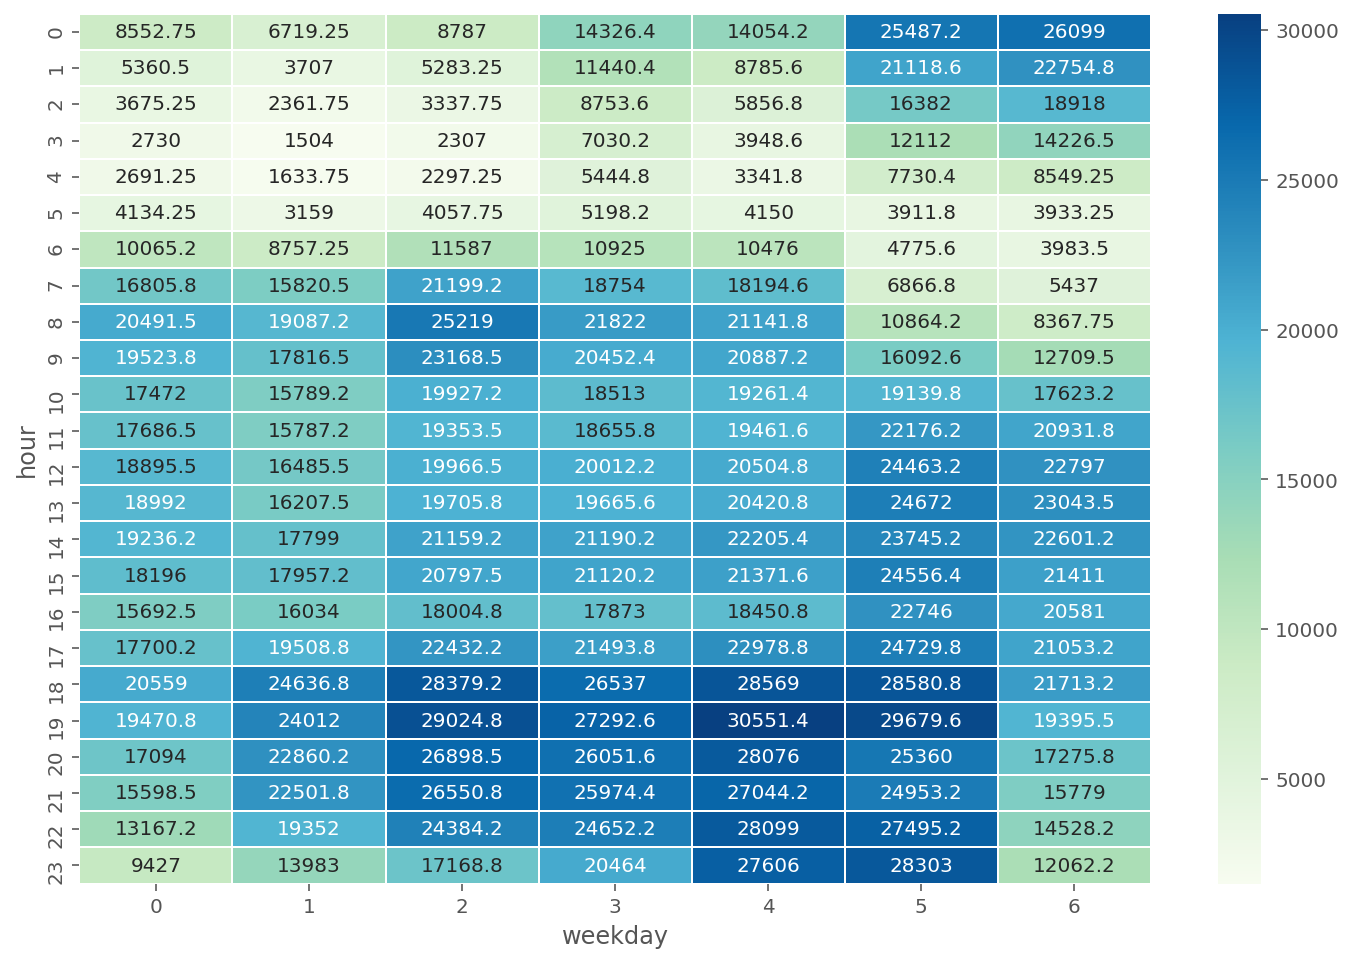

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(df.groupby(['hour', 'weekday'])['cnt'].mean().unstack(),
           lw=.5, annot=True, cmap='GnBu', fmt='g', annot_kws={'size':10});

- high demand for taxis from friday afternoon

In [40]:
average_df = df.groupby(['is_weekend', 'hour']).mean()['cnt'].unstack(level=0).rename(columns={0:"weekday", 1:"weekend"})

<AxesSubplot:xlabel='hour'>

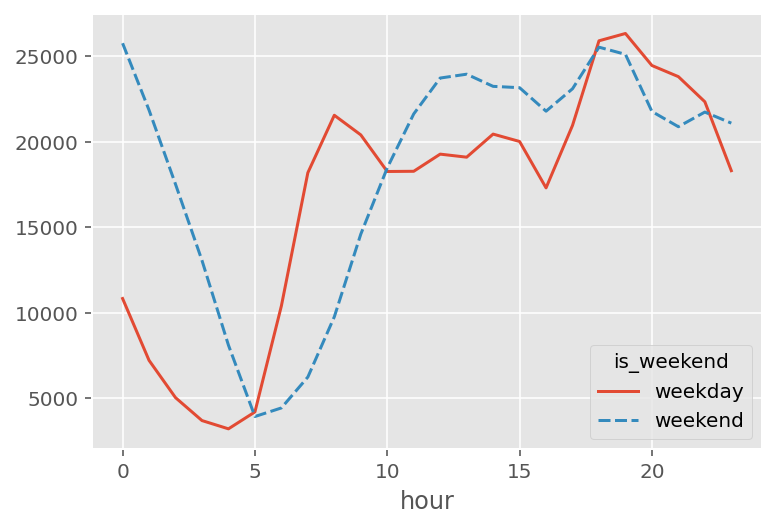

In [41]:
sns.lineplot(data=average_df)

In [42]:
data = df.groupby(['weekday', 'hour']).mean()['cnt'].unstack(level=0).reset_index()
data = data.melt(id_vars="hour", value_vars=[0,1,2,3,4,5,6], value_name='cnt')

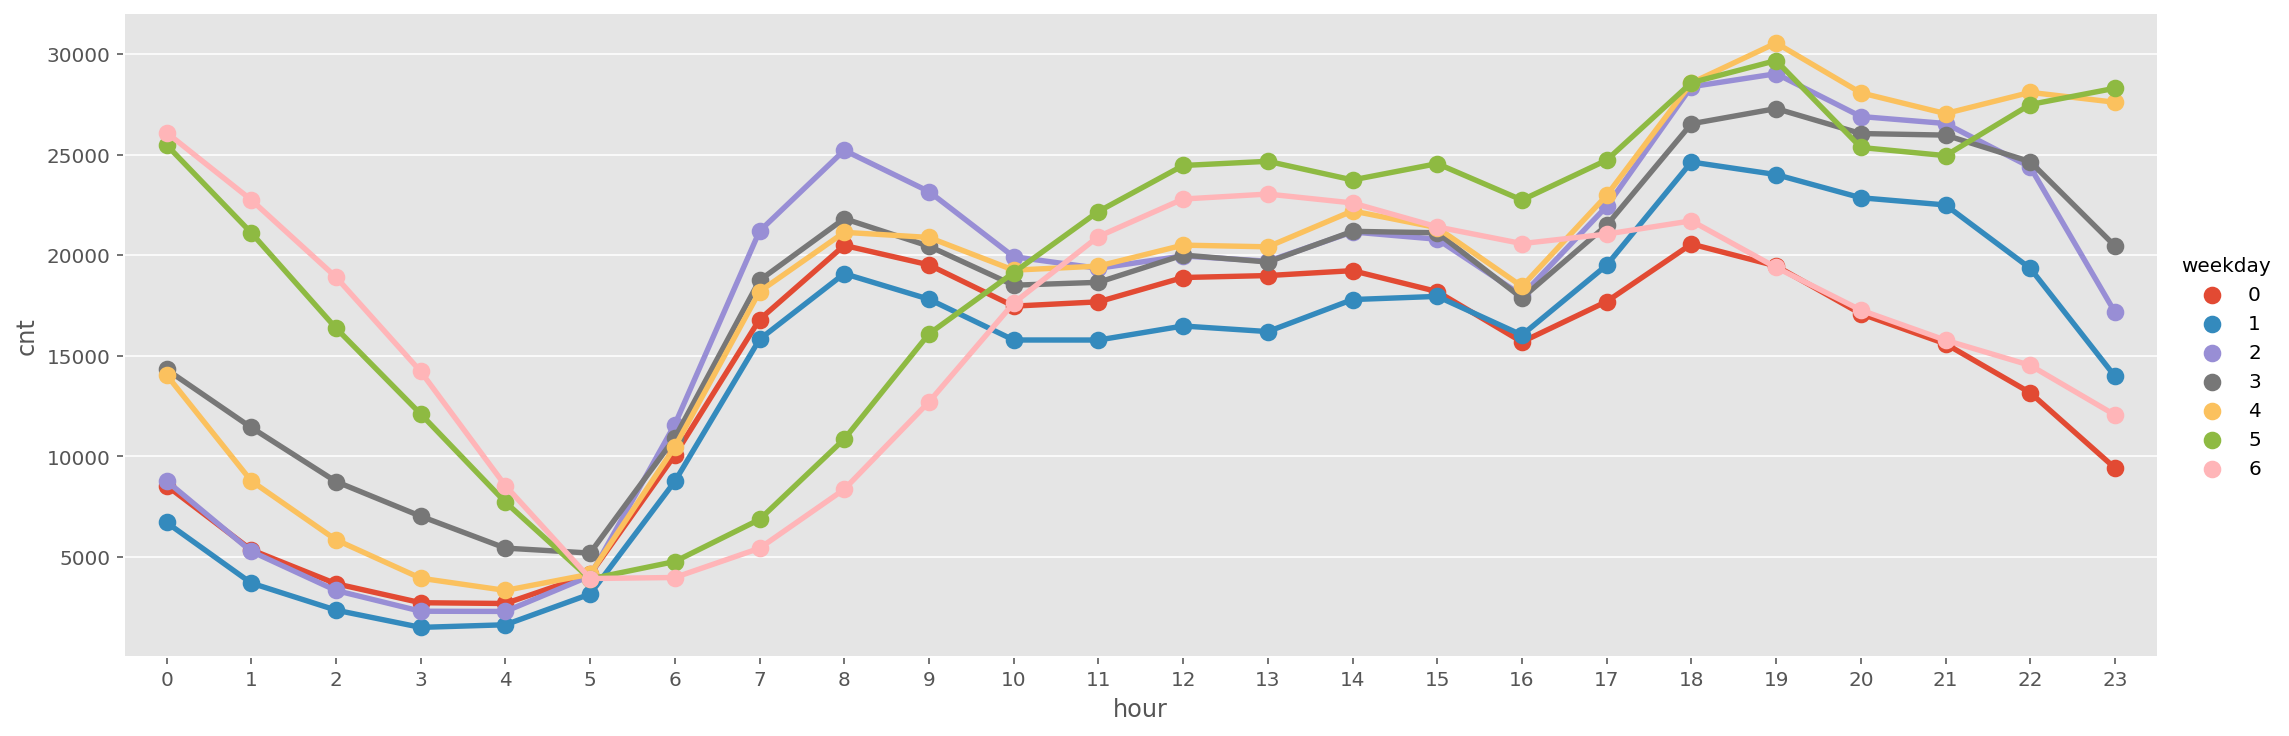

In [43]:
sns.factorplot(x="hour", y='cnt', hue="weekday", data=data, height=5, aspect=3);

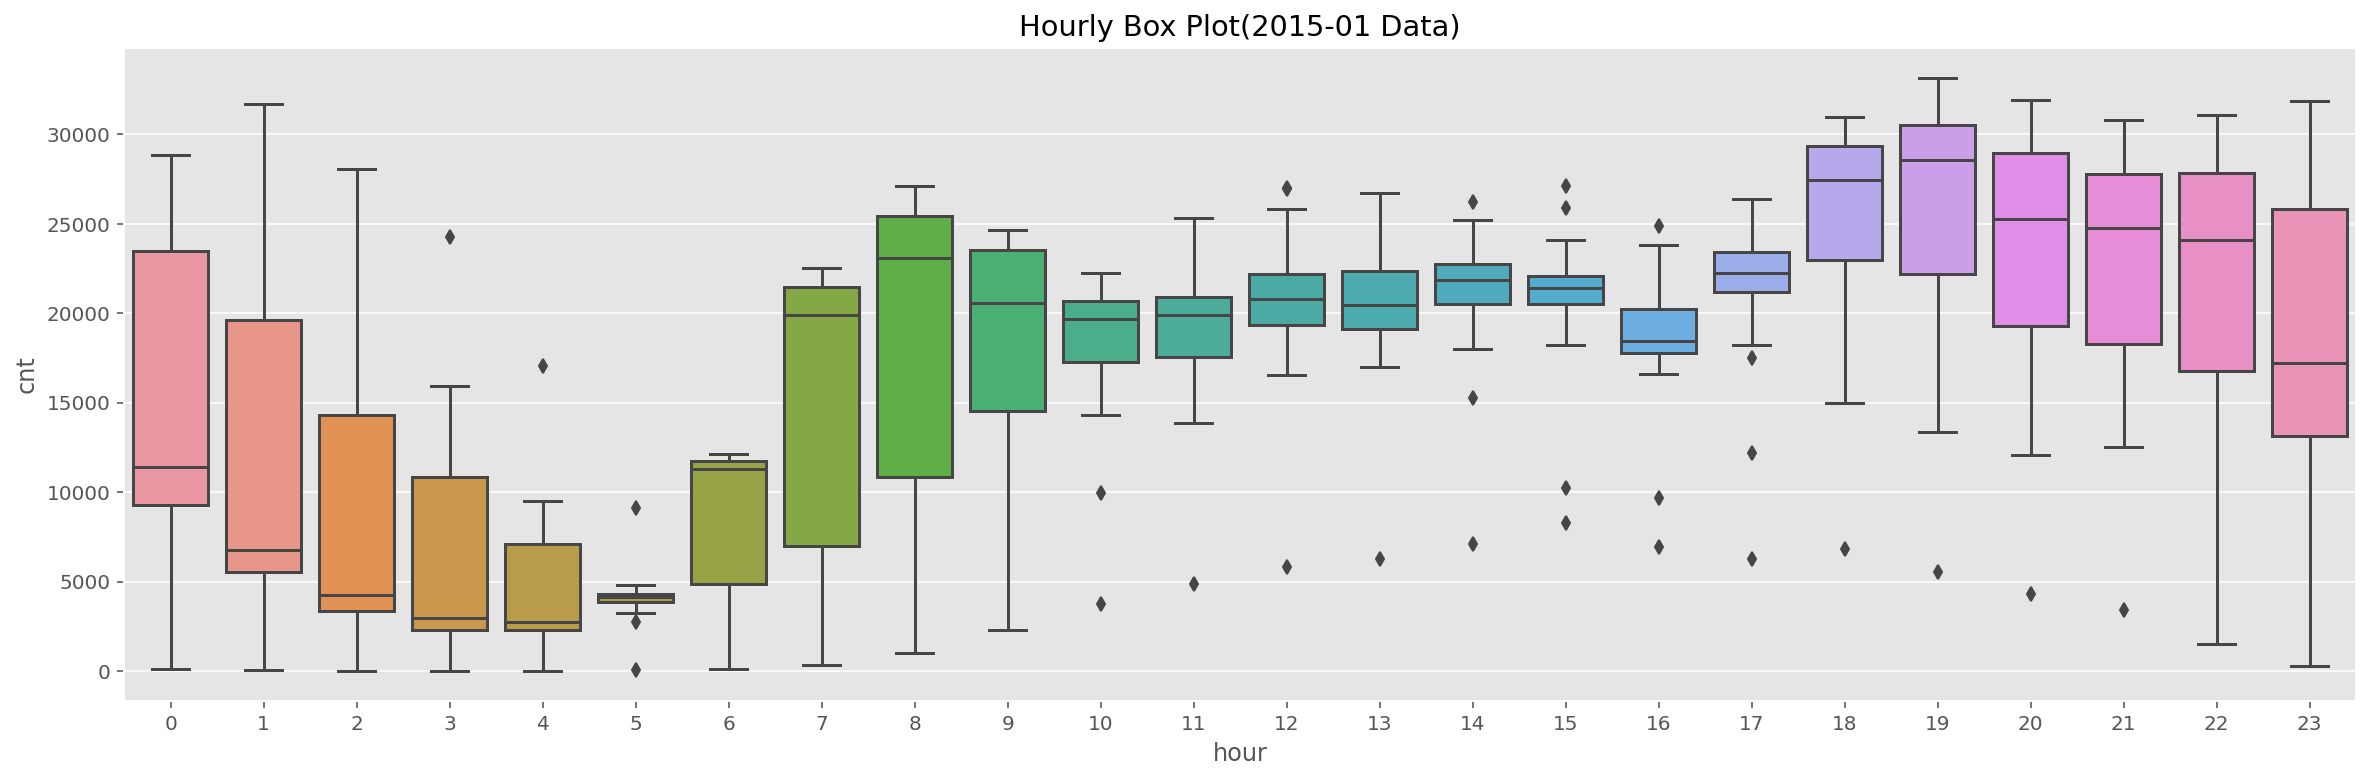

In [46]:
plt.figure(figsize=(20, 6));
sns.boxplot(x='hour', y='cnt', data=df);
plt.title("Hourly Box Plot(2015-01 Data)");

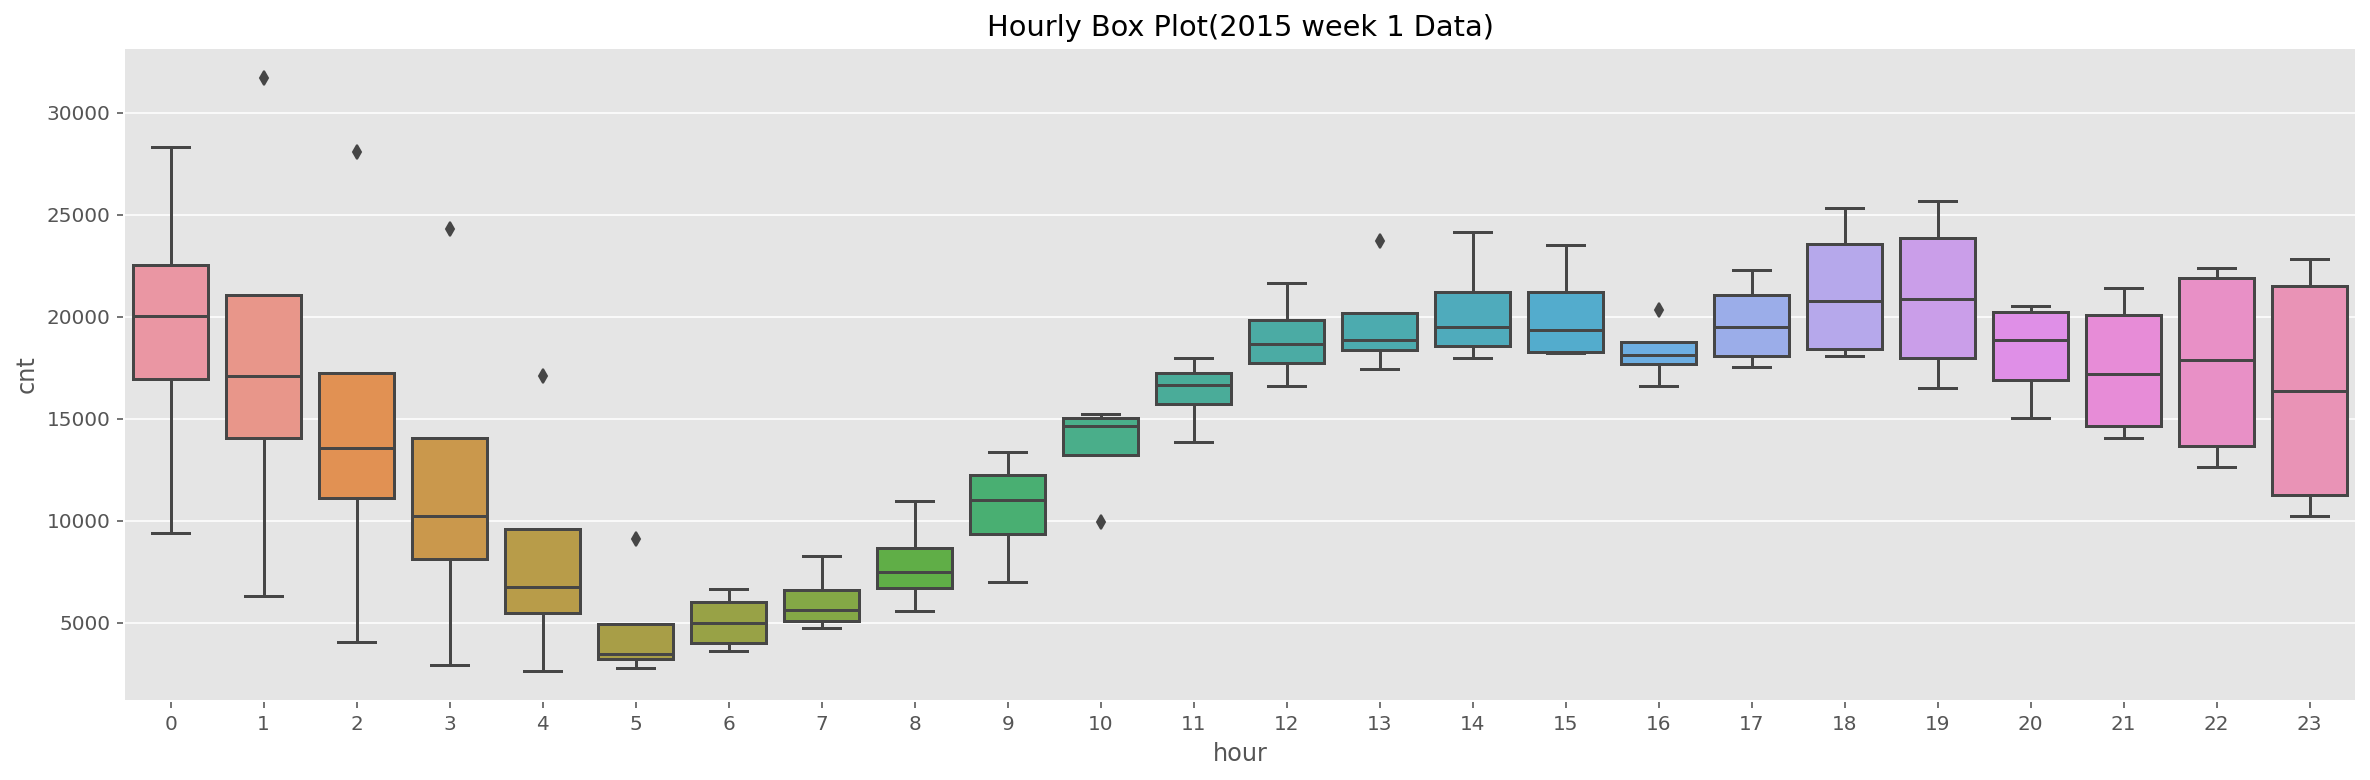

In [47]:
plt.figure(figsize=(20, 6));
sns.boxplot(x='hour', y='cnt', data=df[df['weeknum']==1]);
plt.title("Hourly Box Plot(2015 week 1 Data)");

In [49]:
def visualize_hourly_boxplot_by_weeknum(df, y, weeknum):
    plt.figure(figsize=(16, 6));
    sns.boxplot(x='hour', y=y, data=df[df['weeknum']==weeknum]);
    plt.title(f"Hourly Box Plot(2015-{weeknum:02} Data)");

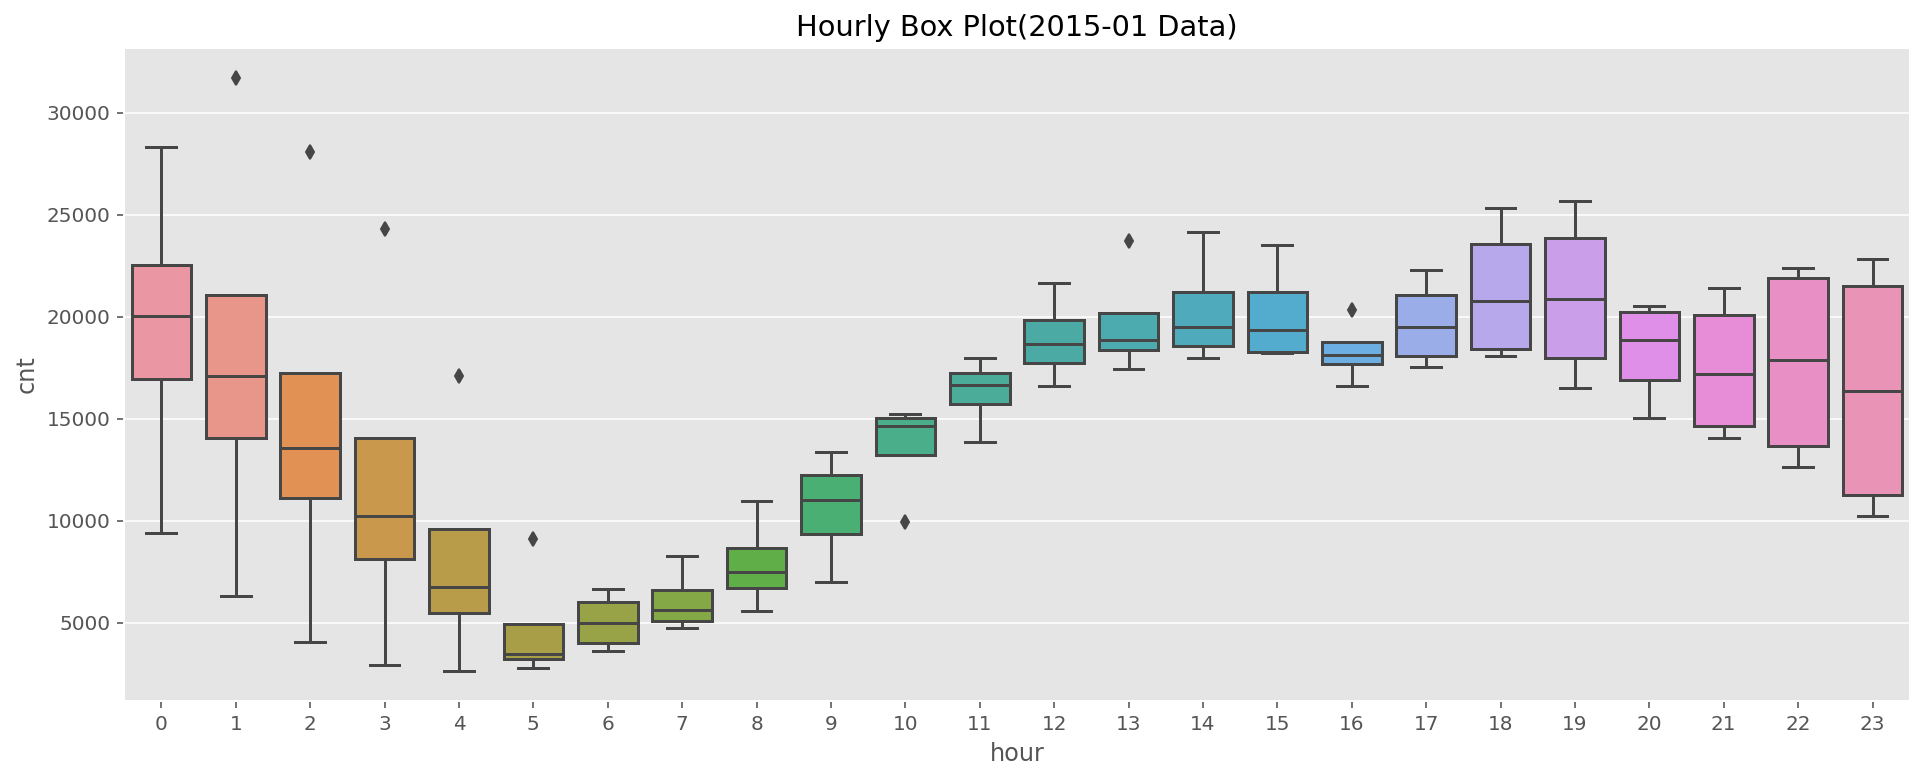

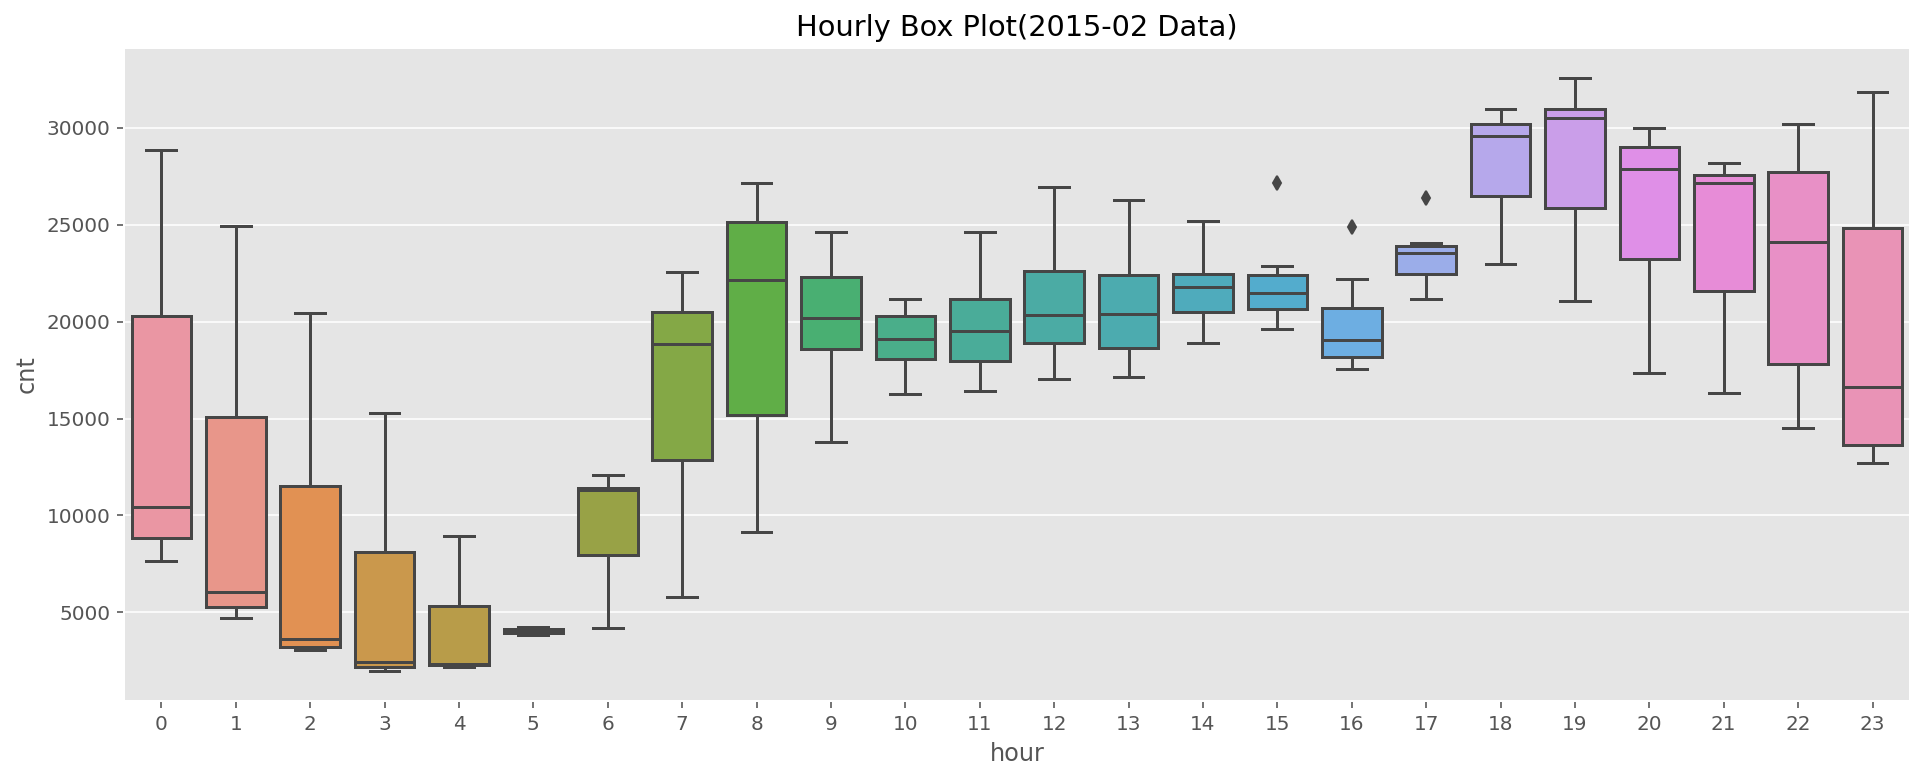

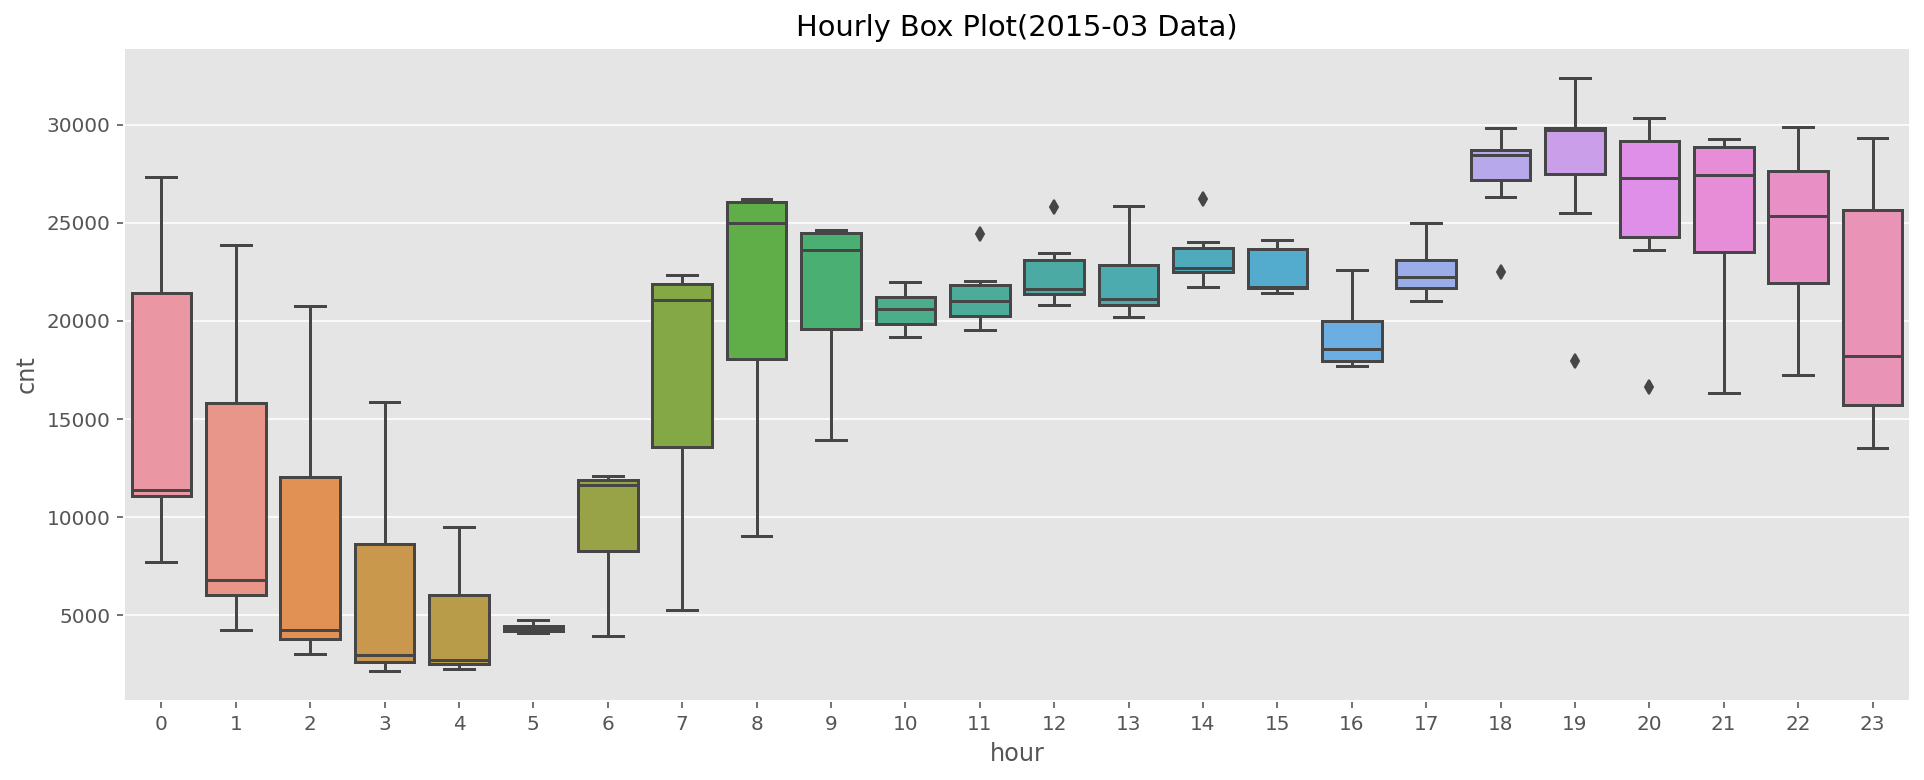

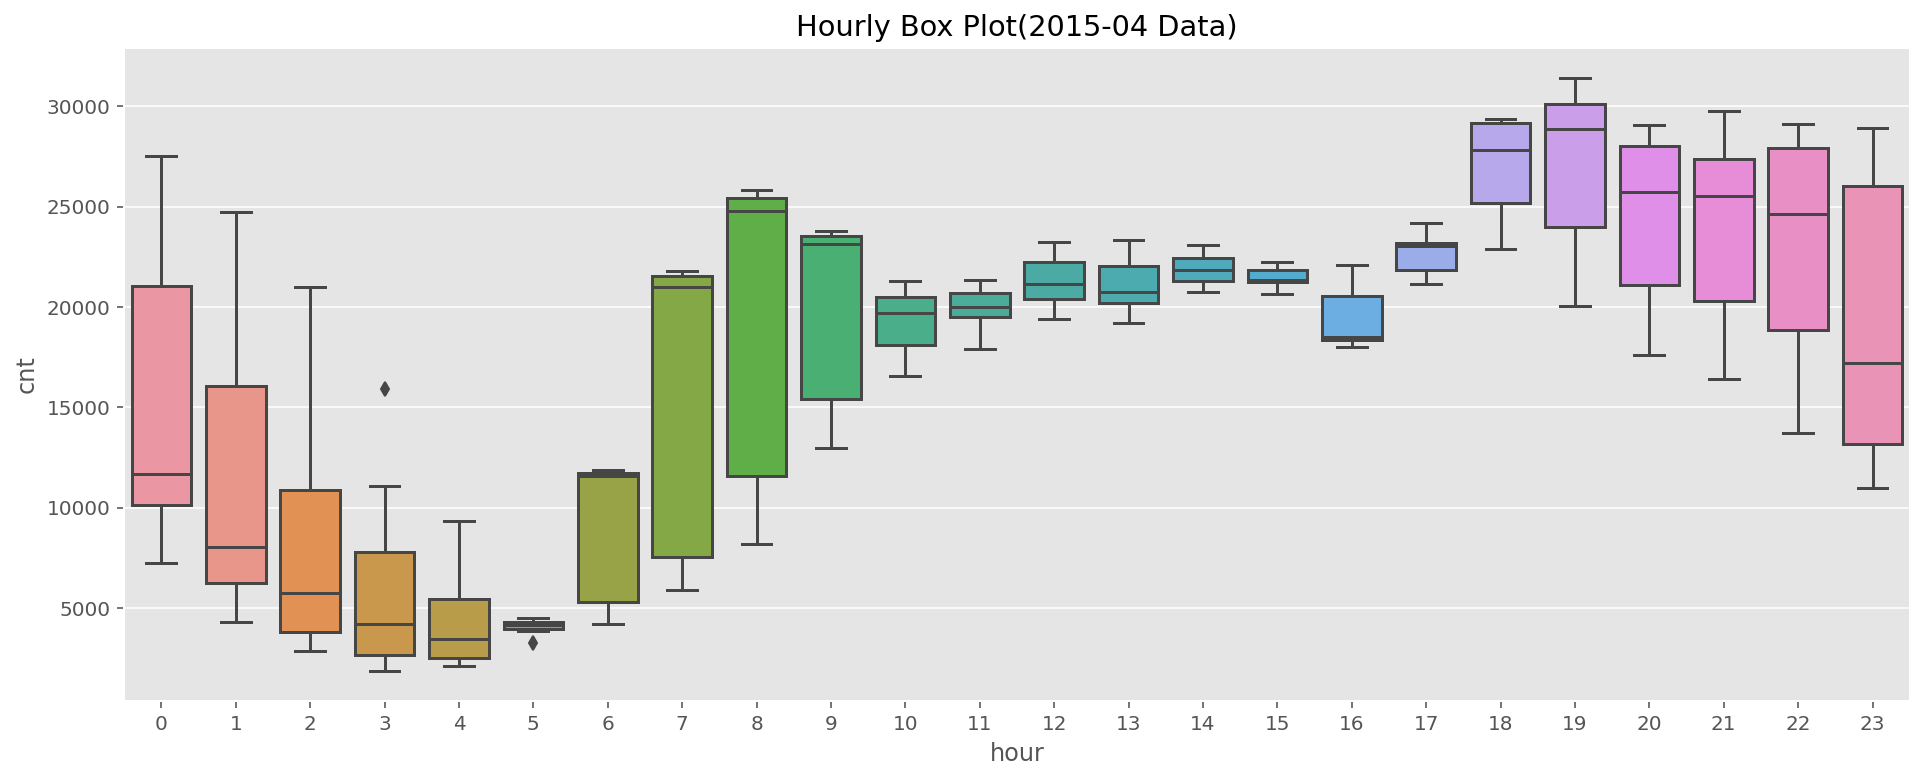

In [50]:
for week in range(1, 5):
    visualize_hourly_boxplot_by_weeknum(df, 'cnt', week)

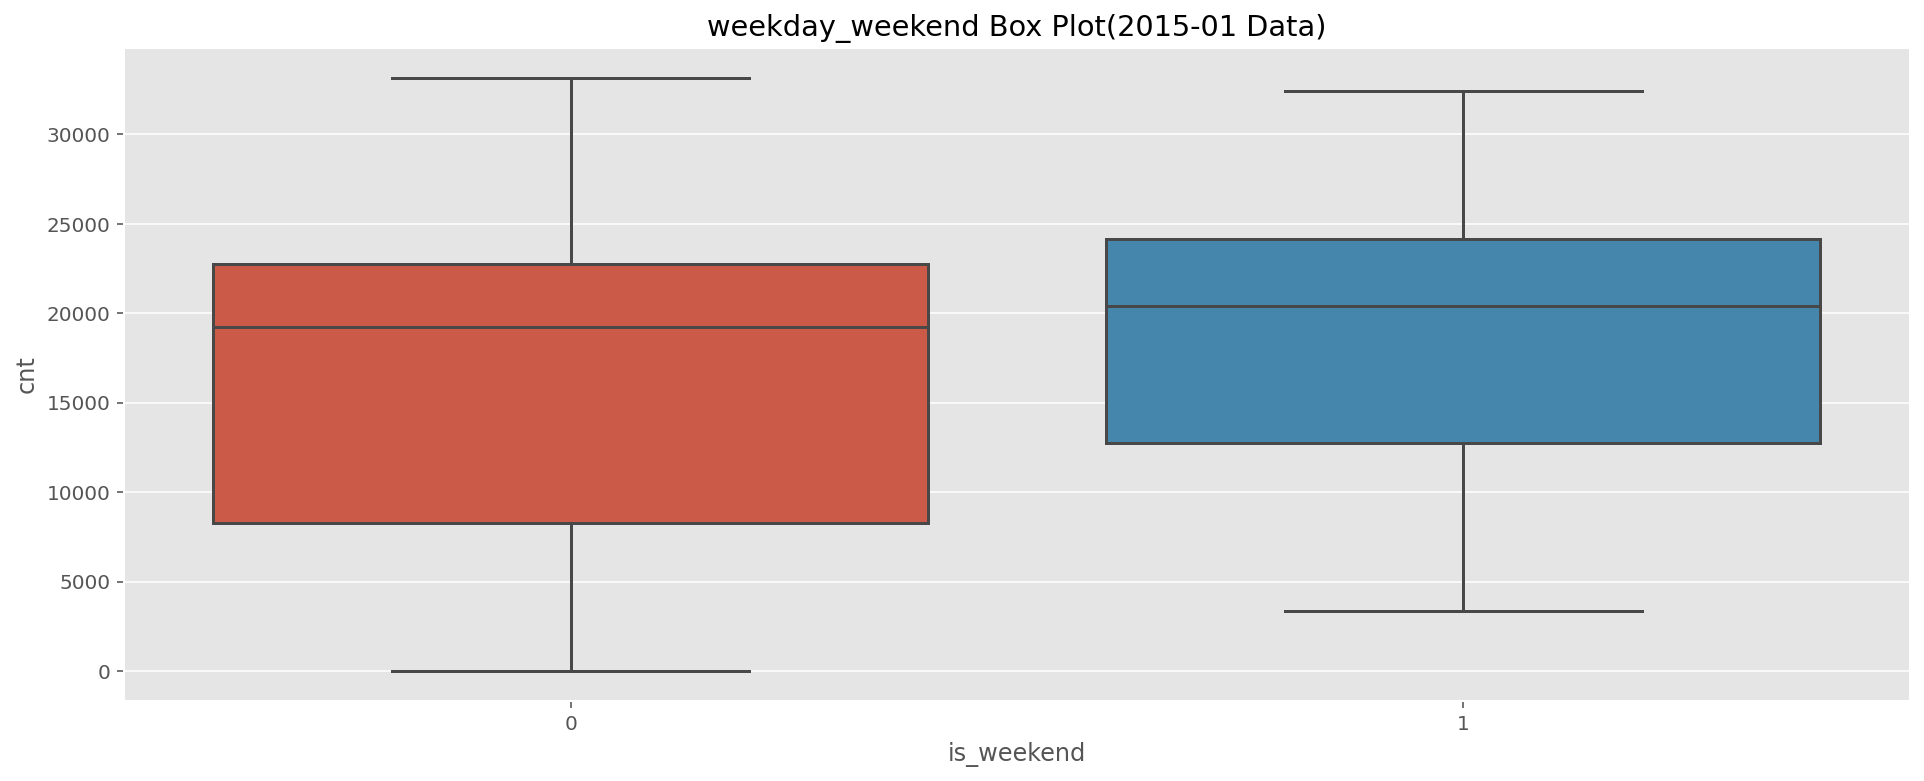

In [52]:
plt.figure(figsize=(16, 6));
sns.boxplot(x='is_weekend', y='cnt', data=df);
plt.title("weekday_weekend Box Plot(2015-01 Data)");

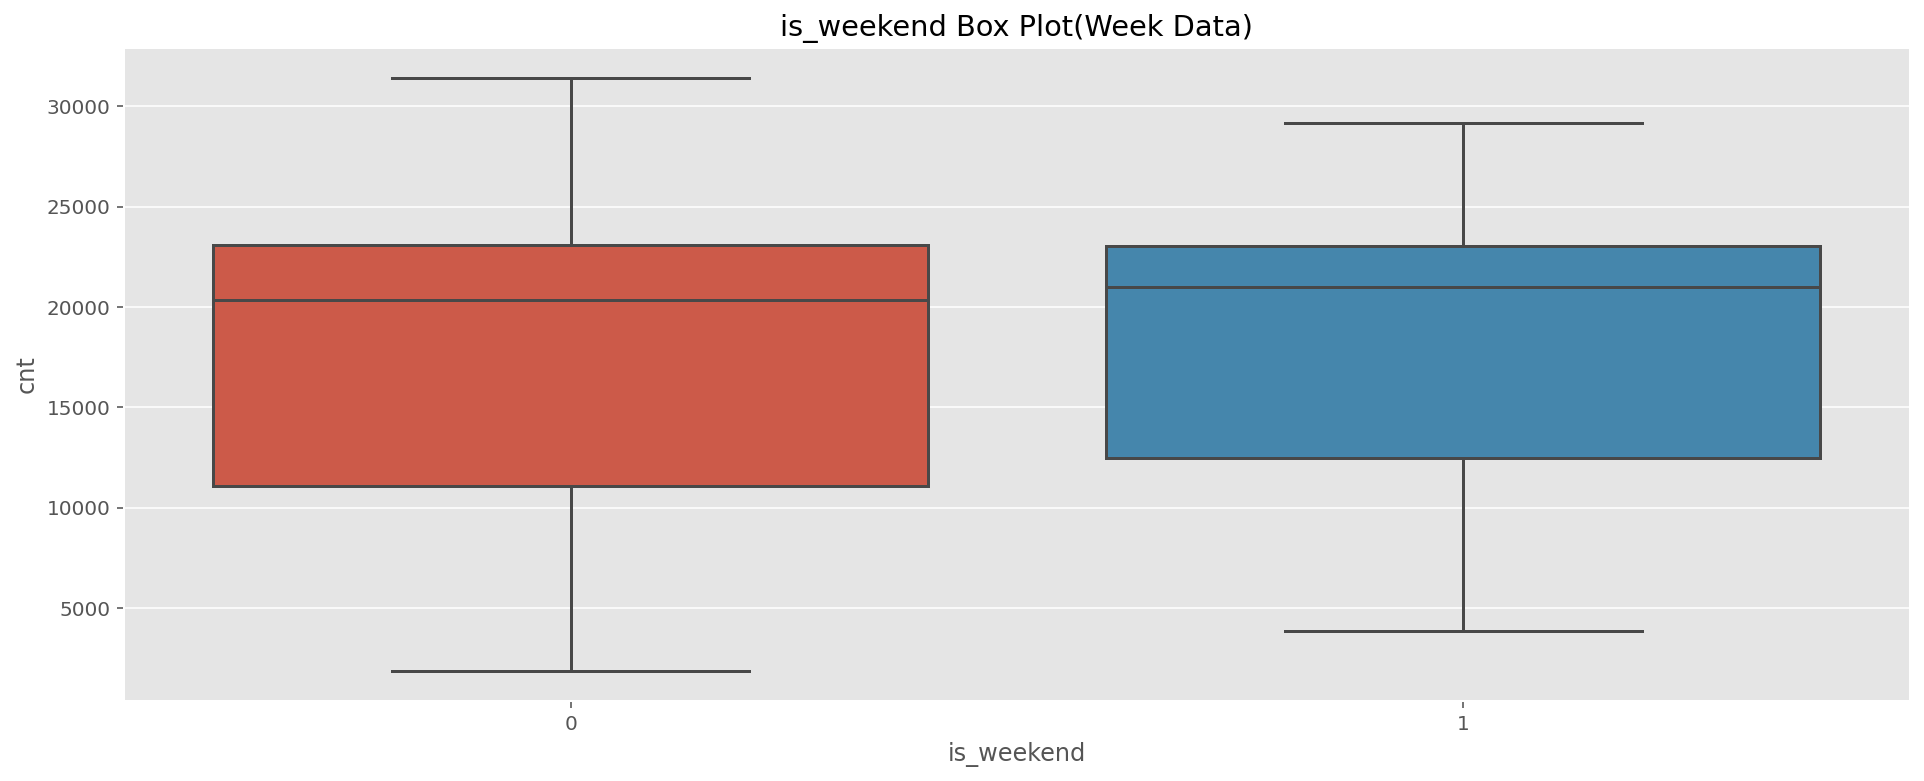

In [53]:
plt.figure(figsize=(16, 6));
sns.boxplot(x='is_weekend', y='cnt', data=df[df['weeknum']==4]);
plt.title("is_weekend Box Plot(Week Data)");

In [54]:
weekday_dict = {
    0:"Monday",
    1:"Tuesday",
    2:"Wednesday",
    3:"Thursday",
    4:"Friday",
    5:"Saturday",
    6:"Sunday"
}

In [55]:
def visualize_violinplot_by_weekday(df, y, weekday):
    plt.figure(figsize=(16, 6));
    sns.violinplot(x="hour", y=y, hue="weekday", 
                   data=df[df['weekday'] == weekday][['hour', 'weekday', y]],
                   inner="quart");    
    plt.title(f"{weekday_dict[weekday]}'s hourly violinplot {y}(2015-01 Data)")

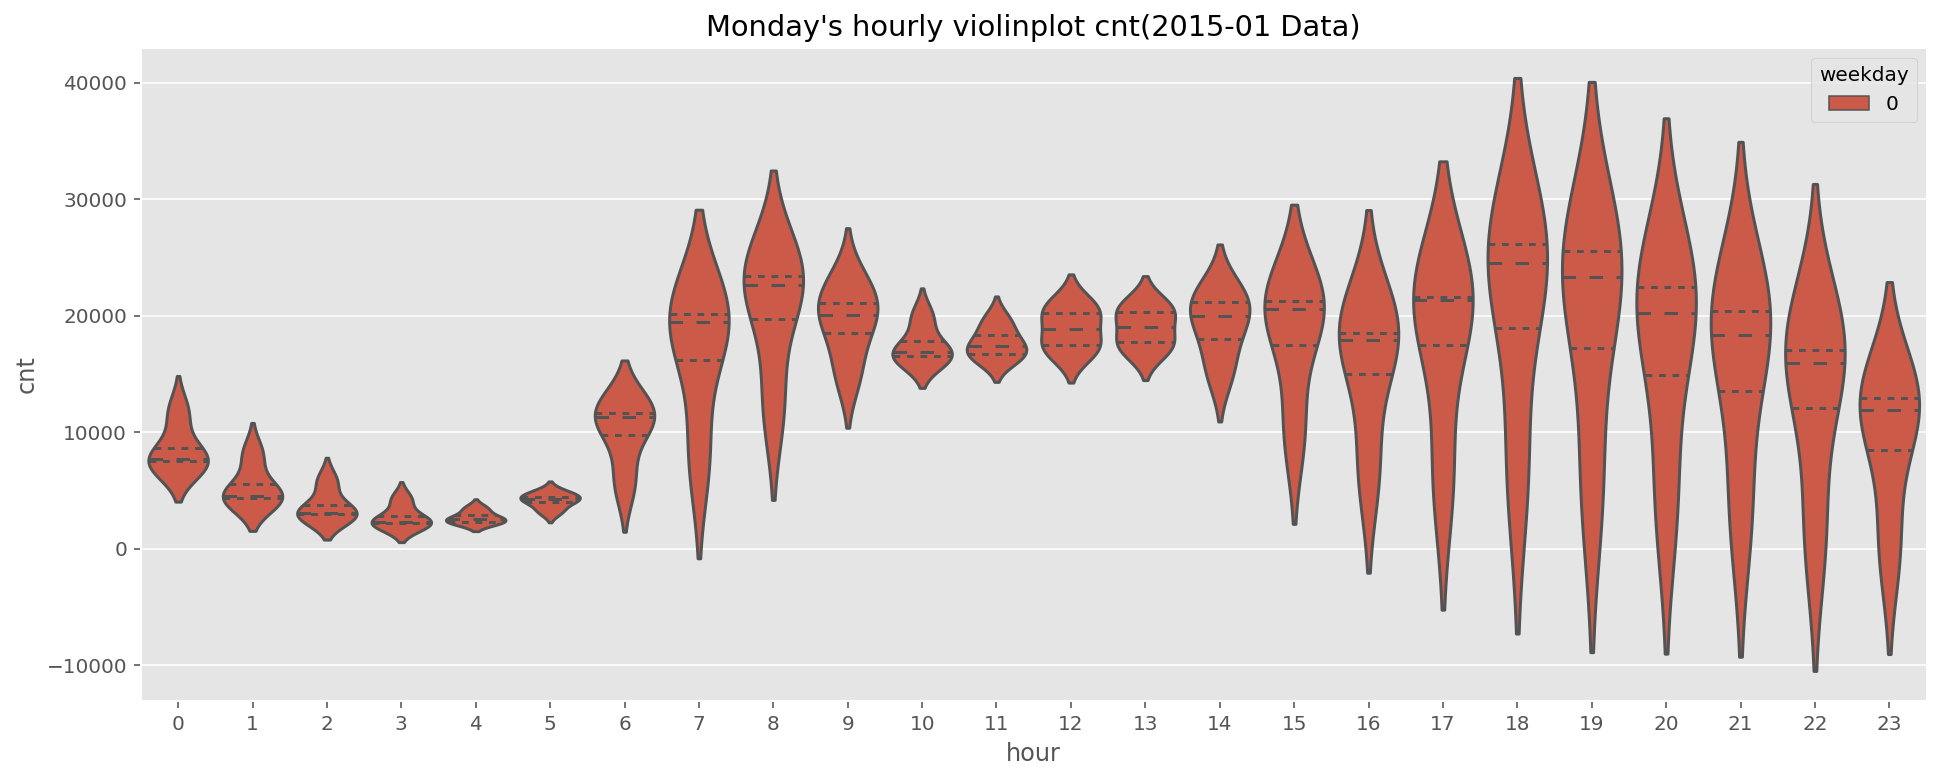

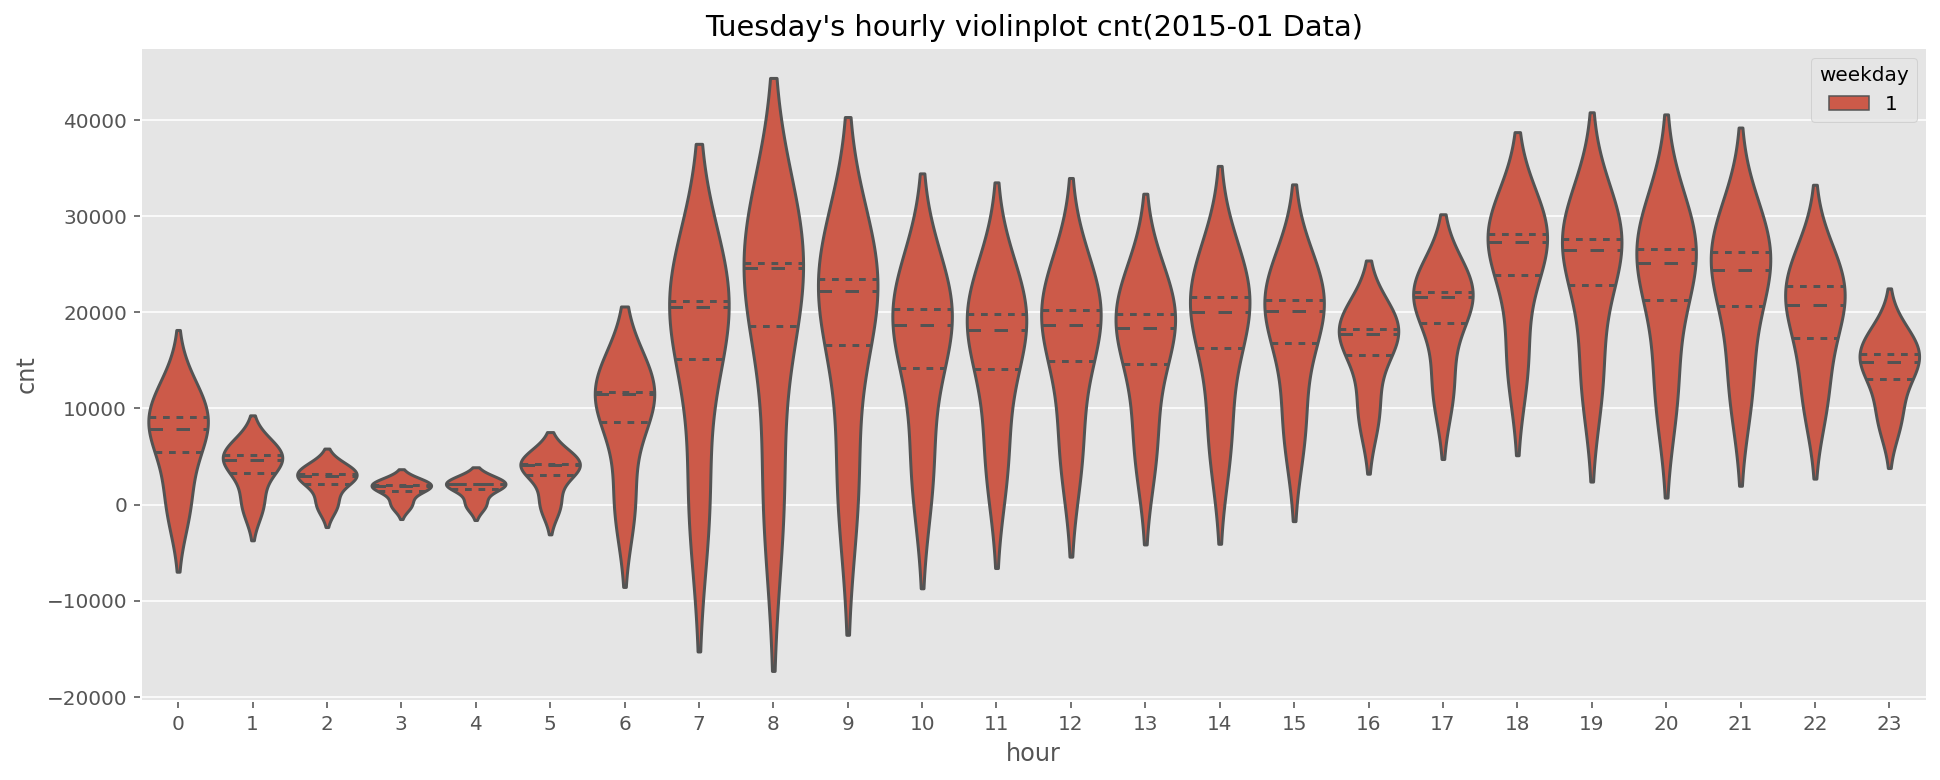

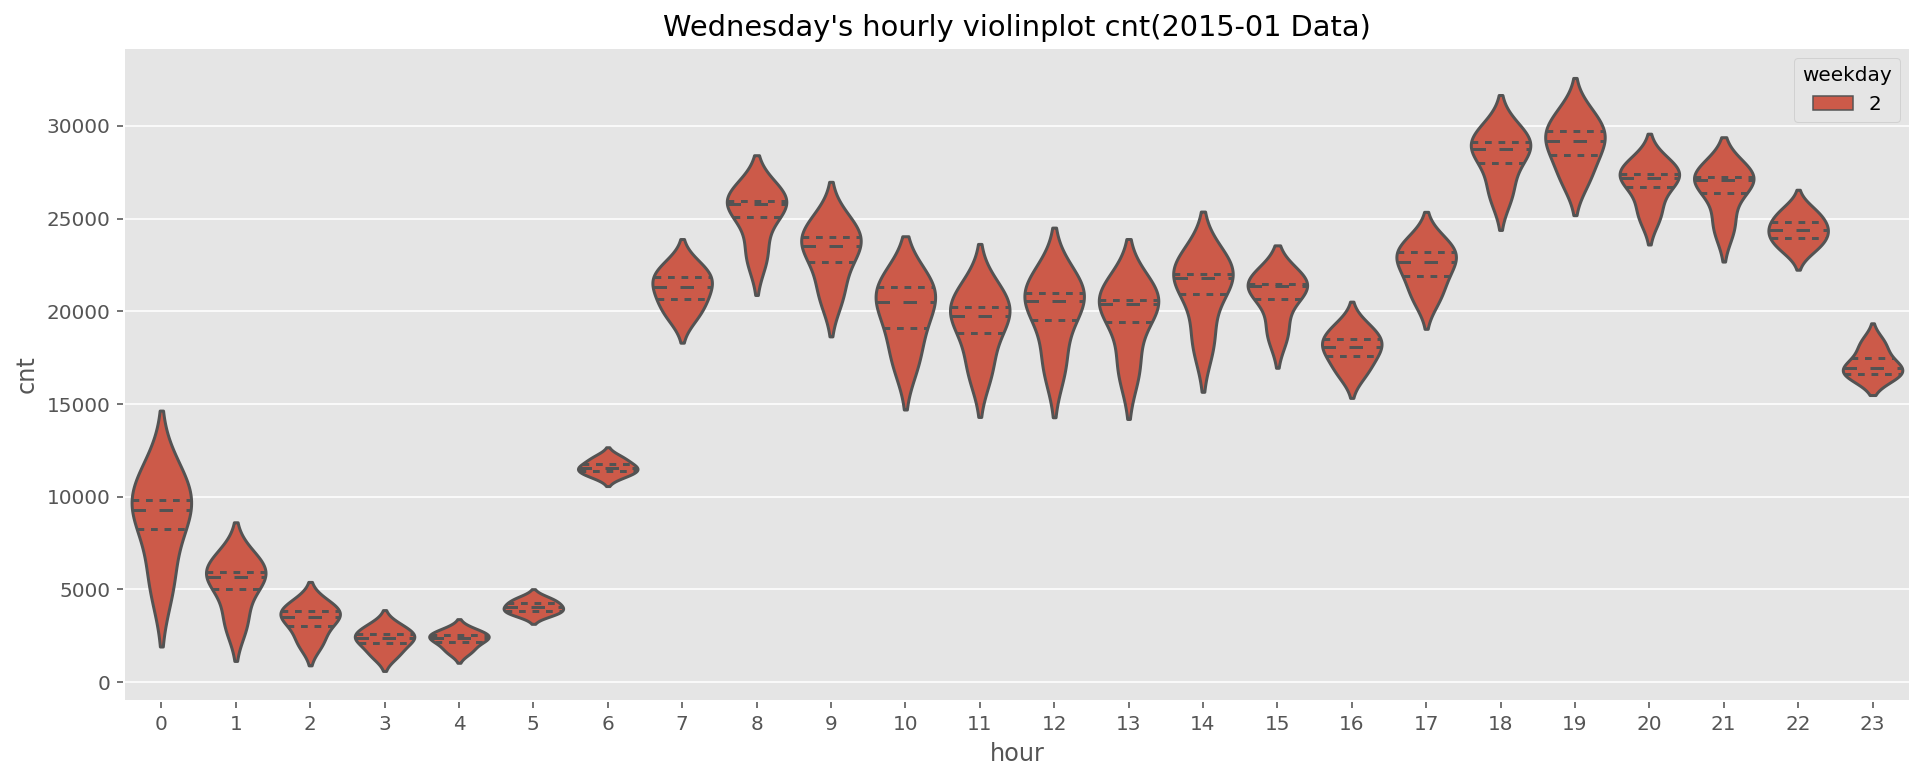

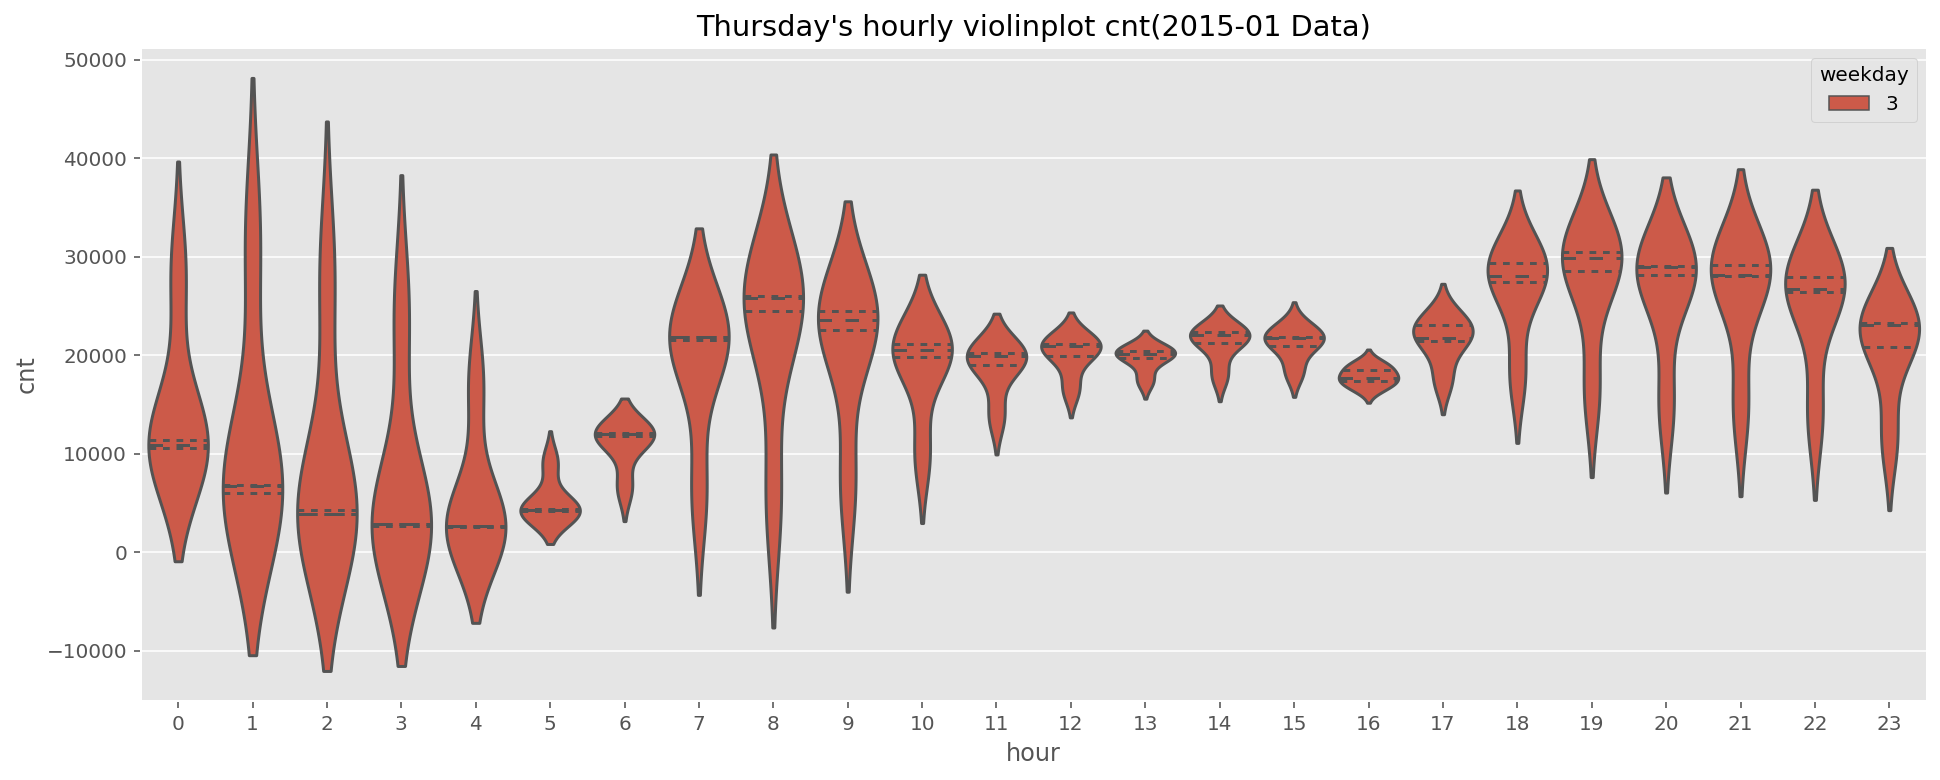

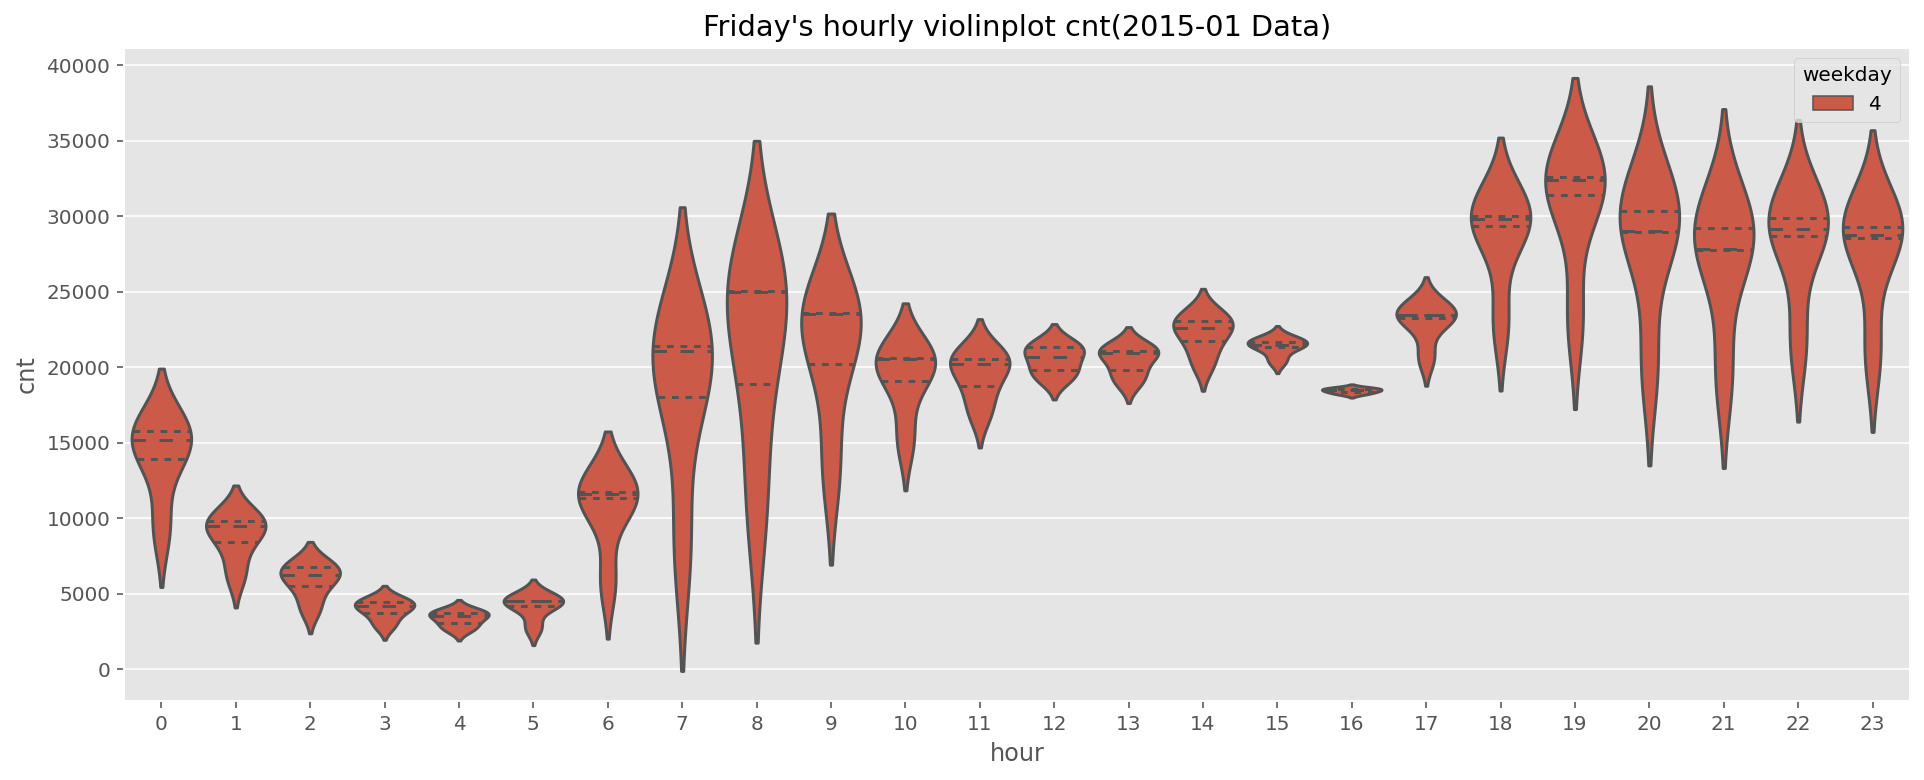

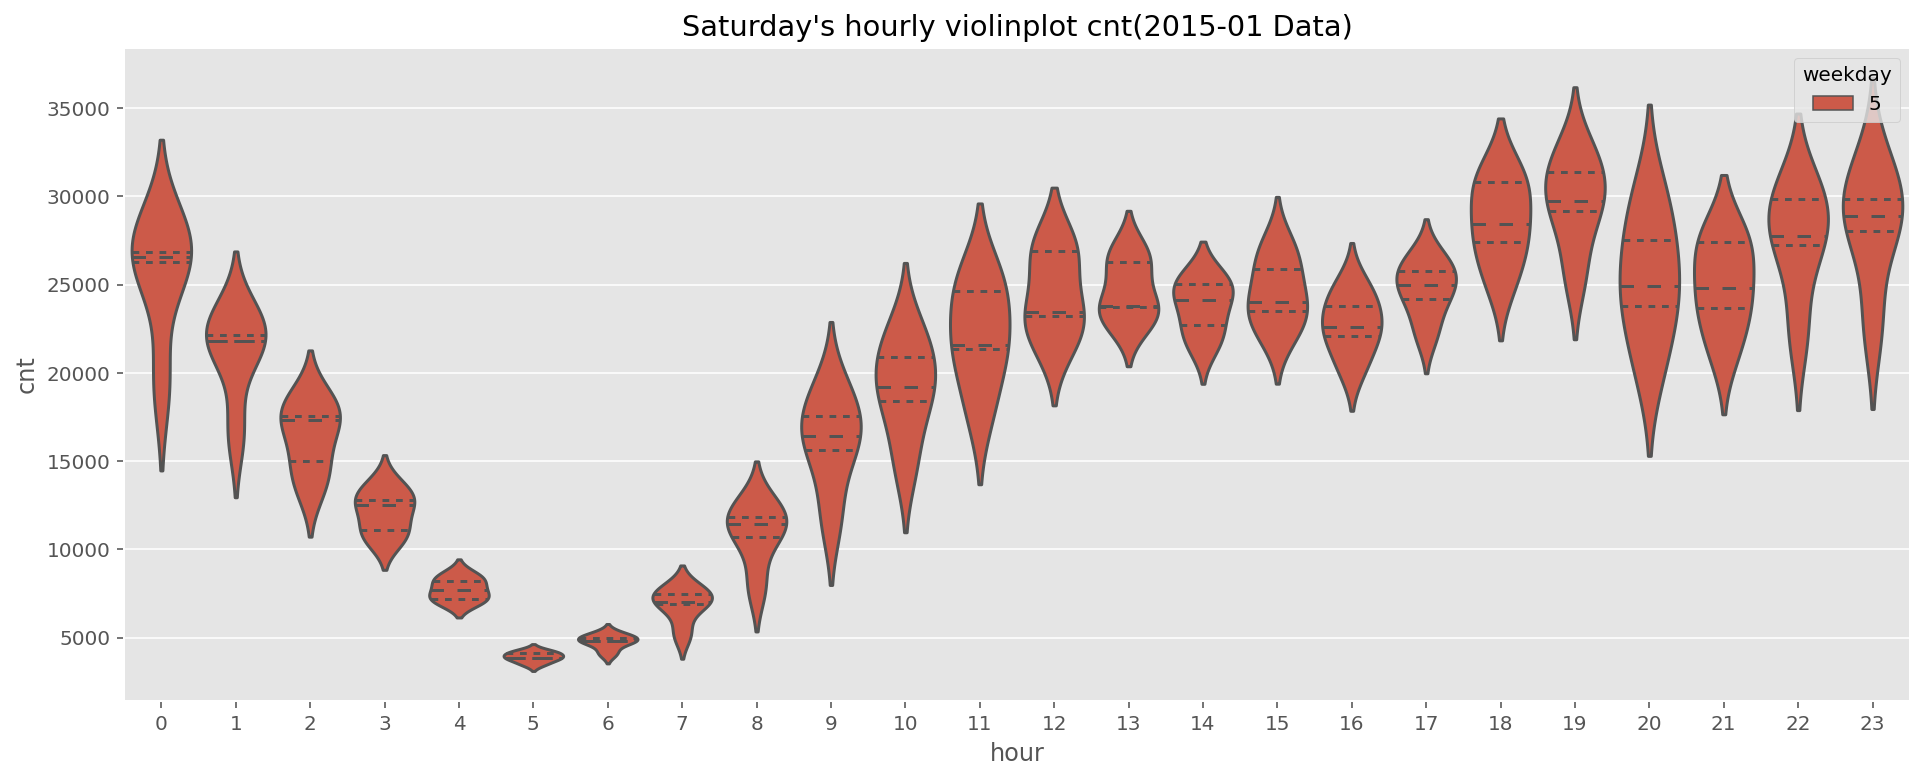

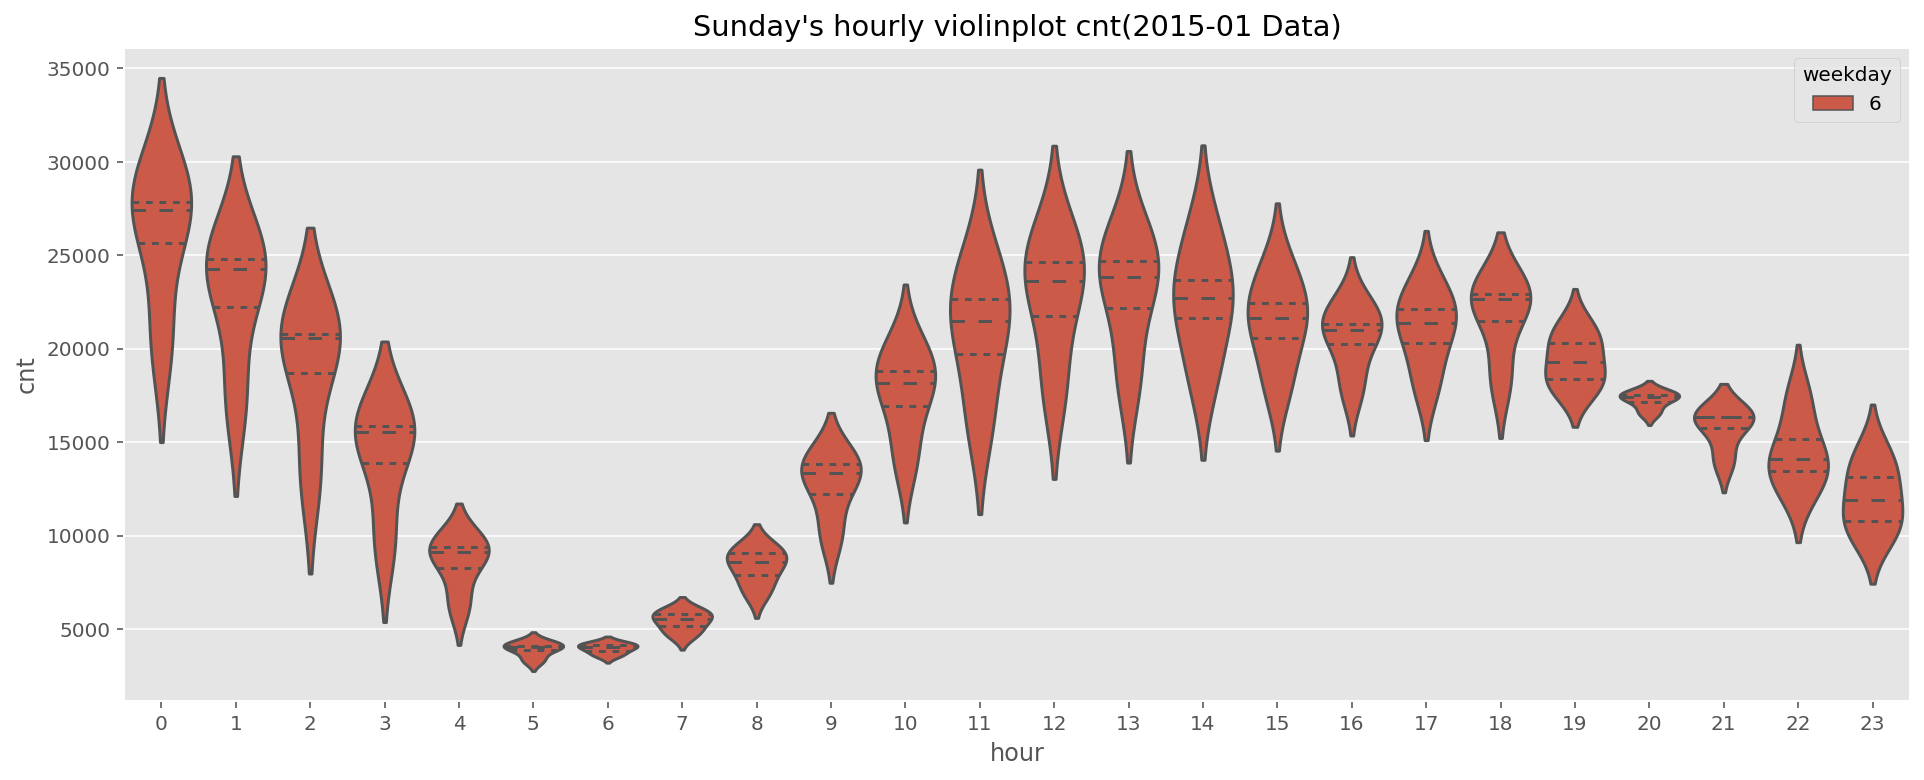

In [57]:
for weekday in range(0, 7):
    visualize_violinplot_by_weekday(df, 'cnt', weekday)

## trip_distance

In [58]:
%%time

trip_distance_query = """
SELECT 
    floor(trip_distance/30)*30 as bucket_floor,
    count(*) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
GROUP BY bucket_floor
order by bucket_floor
"""


trip_distance_query_log = """
SELECT 
    floor(trip_distance/30)*30 as bucket_floor,
    log10(count(*)) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
GROUP BY bucket_floor
order by bucket_floor
"""

distance_df = pd.read_gbq(query=trip_distance_query, dialect='standard', project_id='smiling-office-000000')
distance_log_df = pd.read_gbq(query=trip_distance_query_log, dialect='standard', project_id='smiling-office-000000')

CPU times: user 74.8 ms, sys: 11.2 ms, total: 86 ms
Wall time: 6.23 s


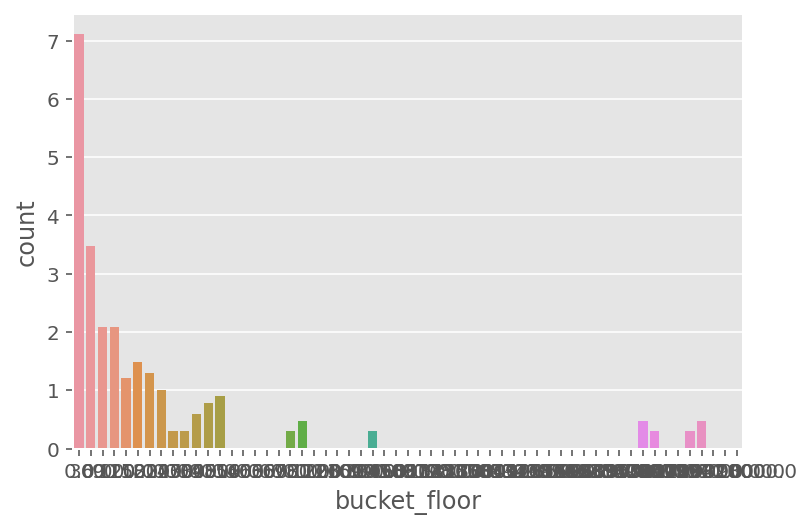

In [59]:
sns.barplot(x=distance_log_df['bucket_floor'], y=distance_log_df['count']);

In [60]:
distance_df.head()

,bucket_floor,count
0,0.0,12745563
1,30.0,3027
2,60.0,120
3,90.0,124
4,120.0,16


### demand (short trip, long trip)

In [62]:
%%time

short_trip_query = """
SELECT 
  EXTRACT(HOUR FROM pickup_datetime) as pickup_hour,
  EXTRACT(HOUR FROM dropoff_datetime) as dropoff_hour,
  count(*) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
and trip_distance < 30
GROUP BY pickup_hour, dropoff_hour
"""

short_trip_df = pd.read_gbq(query=short_trip_query, dialect='standard', project_id='smiling-office-000000')

CPU times: user 37.5 ms, sys: 5.88 ms, total: 43.4 ms
Wall time: 3.8 s


In [63]:
%%time

long_trip_query = """
SELECT 
  EXTRACT(HOUR FROM pickup_datetime) as pickup_hour,
  EXTRACT(HOUR FROM dropoff_datetime) as dropoff_hour,
  count(*) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015`
WHERE EXTRACT(MONTH from pickup_datetime) = 1
and trip_distance >= 30
GROUP BY pickup_hour, dropoff_hour

"""

long_trip_df = pd.read_gbq(query=long_trip_query, dialect='standard', project_id='smiling-office-000000')

CPU times: user 32 ms, sys: 5.74 ms, total: 37.7 ms
Wall time: 2.86 s


In [64]:
short_trip_df.head()

,pickup_hour,dropoff_hour,count
0,20,20,598237
1,23,0,108476
2,12,12,508667
3,7,8,101025
4,1,1,293069


In [66]:
long_trip_df.head()

,pickup_hour,dropoff_hour,count
0,16,17,139
1,3,4,36
2,18,19,114
3,23,23,38
4,23,0,105


In [67]:
trip_df = short_trip_df.merge(long_trip_df, on=["pickup_hour", "dropoff_hour"], suffixes=["_short", "_long"]) \
                       .rename(columns={"count_short":"short_trips", "count_long":"long_trips"})

In [68]:
trip_df.head()

,pickup_hour,dropoff_hour,short_trips,long_trips
0,20,20,598237,29
1,23,0,108476,105
2,12,12,508667,23
3,7,8,101025,94
4,1,1,293069,28


In [69]:
trip_df_pickup = trip_df.groupby(["pickup_hour"], as_index=False).agg({'short_trips':'sum', 'long_trips':'sum'}) \
                                                                      .sort_values(by="pickup_hour")
trip_df_dropoff = trip_df.groupby(["dropoff_hour"], as_index=False).agg({'short_trips':'sum', 'long_trips':'sum'}) \
                                                                      .sort_values(by="dropoff_hour")

In [70]:
trip_df_pickup.head()

,pickup_hour,short_trips,long_trips
0,0,469713,146
1,1,354890,94
2,2,267918,89
3,3,198414,59
4,4,143109,62


In [71]:
def plt_clock(ax, radii, title, color):
    N = 24
    bottom = 2

    # 24시간을 위한 theta 생성
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

    # plot의 각각의 bin width 지정
    width = 2*np.pi / N
    
    bars = ax.bar(theta, radii, width=width, bottom=bottom, color=color, edgecolor="#999999")

    # label을 시계 방향으로 설정하고 위에서 시작
    ax.set_theta_zero_location("N")
    # 시계 방향 설정
    ax.set_theta_direction(-1)

    # label
    ax.set_xticks(theta)
    ticks = ["{}:00".format(x) for x in range(24)]
    ax.set_xticklabels(ticks)
    ax.set_title(title)

In [72]:
def diff_short_long_trip_on_time(trip_df_pickup, trip_df_dropoff):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,18))

    ax = plt.subplot(2,2,1, polar=True)
    # 24시간의 각각의 bin에 히스토그램 그림
    radii = np.array(trip_df_pickup['short_trips'].tolist(), dtype="int64")
    title = "Pickup Time for Short Trips"
    plt_clock(ax, radii, title, "#dc143c")

    ax = plt.subplot(2,2,2, polar=True)
    # 24시간의 각각의 bin에 히스토그램 그림
    radii = np.array(trip_df_pickup['long_trips'].tolist(), dtype="int64")
    title = "Pickup Time for Long Trips"
    plt_clock(ax, radii, title, "#56B4E9")

    ax = plt.subplot(2,2,3, polar=True)
    radii = np.array(trip_df_dropoff['short_trips'].tolist(), dtype="int64")
    title = "Dropoff Time for Short Trips"
    plt_clock(ax, radii, title, "#dc143c")

    ax = plt.subplot(2,2,4, polar=True)
    radii = np.array(trip_df_dropoff['long_trips'].tolist(), dtype="int64")
    title = "Dropoff Time for Long Trips"
    plt_clock(ax, radii, title, "#56B4E9")

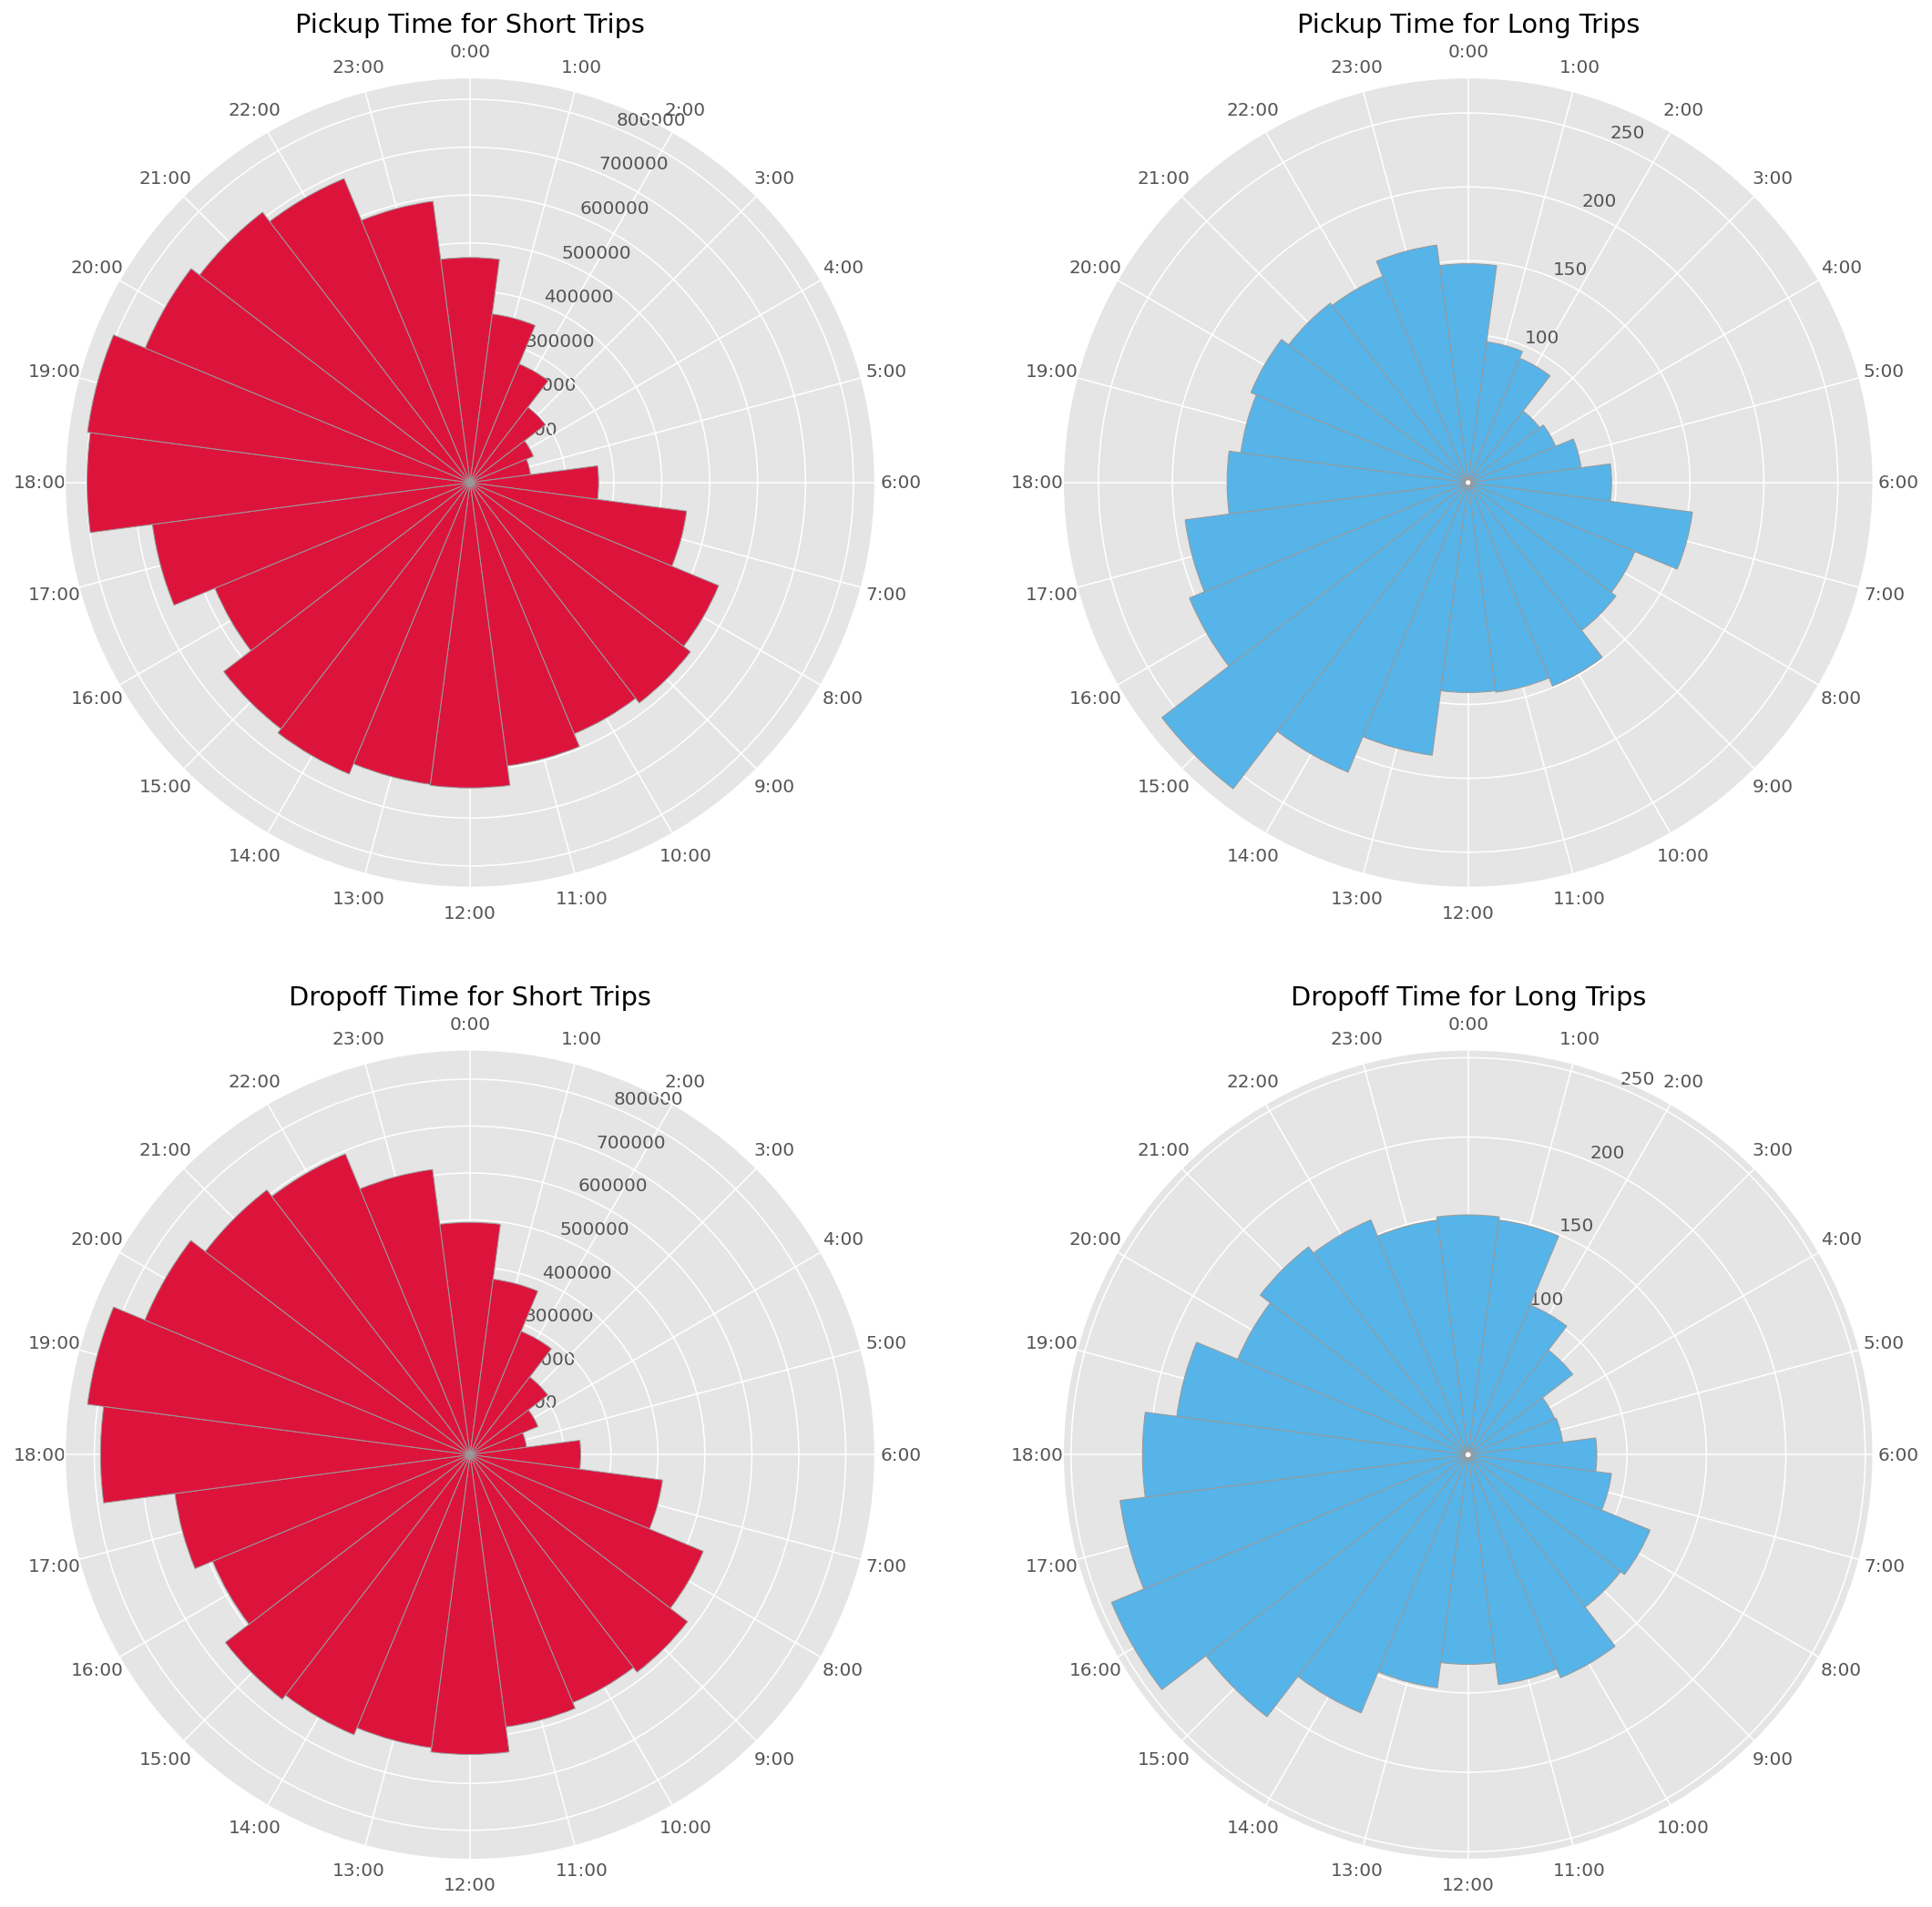

In [73]:
diff_short_long_trip_on_time(trip_df_pickup, trip_df_dropoff)

- Peak hour by distance
    - Short trip
        - 18:00 ~ 22:00
    - Long trip
        - 13:00 ~ 15:30